# Subtle OOR effects

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
import scanpy as sc 
import pandas as pd
import numpy as np
import milopy
import scipy

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import oor_benchmark
import oor_benchmark.metrics.utils

sns.set_context('talk')
from matplotlib.pyplot import rc_context

In [3]:
figdir = '/home/jovyan/mount/gdrive/diff2atlas/figures/pbmc_design_comparison_v2/'
if not os.path.exists(figdir):
    os.mkdir(figdir)

In [4]:
## r2py setup
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)


In [5]:
%load_ext rpy2.ipython

In [6]:
%%R -i figdir
library(tidyverse)
library(patchwork)
library(ggrastr)

remove_x_axis <- function(){
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank())  
}

remove_y_axis <- function(){
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.title.y = element_blank())  
}

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to create bus connection: Host is down


In [7]:
## Some utils

def _plot_nhood_sizes(adata, bins=50, **kwargs):
    plt.hist(np.array(adata.obsm['nhoods'].sum(0)).ravel(), bins=bins, **kwargs);
    plt.xlabel('# cells');plt.ylabel('# nhoods');
    
def get_nhood_adata(adata):
    return(adata.uns['nhood_adata'])

def get_cells_from_nhood(adata, i):
    return((adata.obsm['nhoods'][:,i].toarray() == 1).flatten())

def remove_x_axis(ax):
    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator());
    ax.set_xlabel('');

def remove_y_axis(ax):
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator());
    ax.set_ylabel('');
    
def make_ct_label(label):
    return(' '.join(label.split('_')))

In [8]:
## Define color palette
pal = sns.color_palette('Paired').as_hex()
design_palette = {'ACR':pal[3], 'CR scArches':pal[7], 'AR':pal[9], 'CR scVI':pal[6]}
design_palette_df = pd.DataFrame(design_palette.values(), index =design_palette.keys() )
design_palette_df.columns = ['color']

In [9]:
%%R -i design_palette_df
design_palette <- setNames(design_palette_df$color, rownames(design_palette_df))

scale_color_design <- function(){
    scale_color_manual(values=design_palette, name='design')
}

scale_fill_design <- function(){
    scale_color_manual(values=design_palette, name='design')
}

In [10]:

short_pop_names = {
    "DC":'conventional_dendritic_cell', 
    "naive B":'naive_B_cell',
    "memory B":'memory_B_cell',
    "CM CD4+T":'central_memory_CD4_positive_alpha_beta_T_cell', 
    'plasmablast':'plasmablast',
    'platelet':'platelet', 
 "pDC":'plasmacytoid_dendritic_cell',
     "neutrophil":'neutrophil',
#     "cDC":'conventional_dendritic_cell',
 'naive CD4+T':'naive_thymus_derived_CD4_positive_alpha_beta_T_cell',
"classical monocyte":'classical_monocyte', 
    'CD14+ monocyte':'CD14_positive_monocyte',
 'erythrocyte':'erythrocyte',
       "naive CD8+T":'naive_thymus_derived_CD8_positive_alpha_beta_T_cell',
       "NK":'natural_killer_cell',
       "EM CD8+T":'effector_memory_CD8_positive_alpha_beta_T_cell',
       'MAIT':'mucosal_invariant_T_cell', 
 'CD14lo CD16hi monocyte':'CD14_low_CD16_positive_monocyte',
    "HPP":'hematopoietic_precursor_cell'
}

short_pop_names={v:k for k,v in short_pop_names.items()}

## Show example

In [180]:
sc.settings.figdir = figdir

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


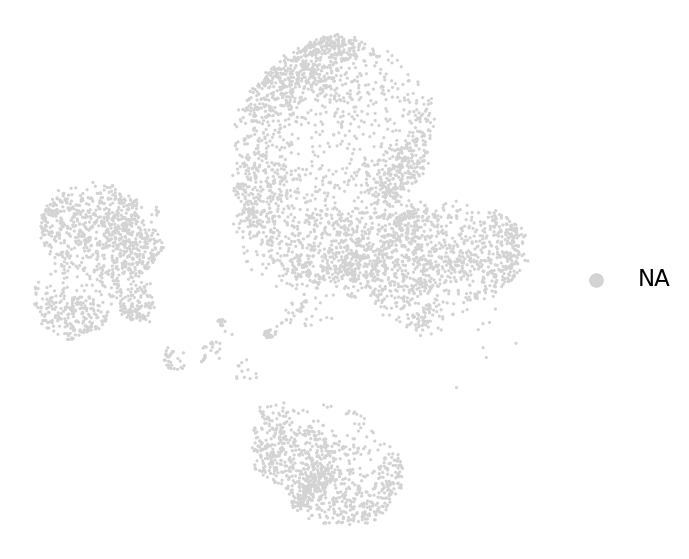

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


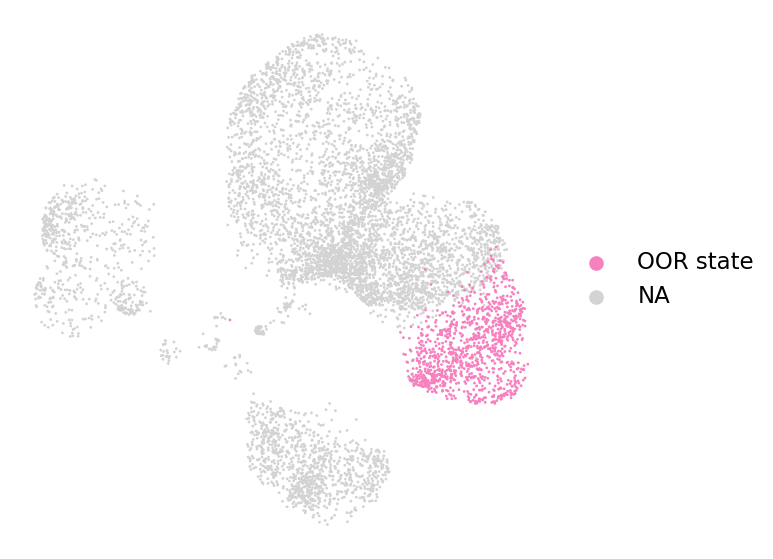

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


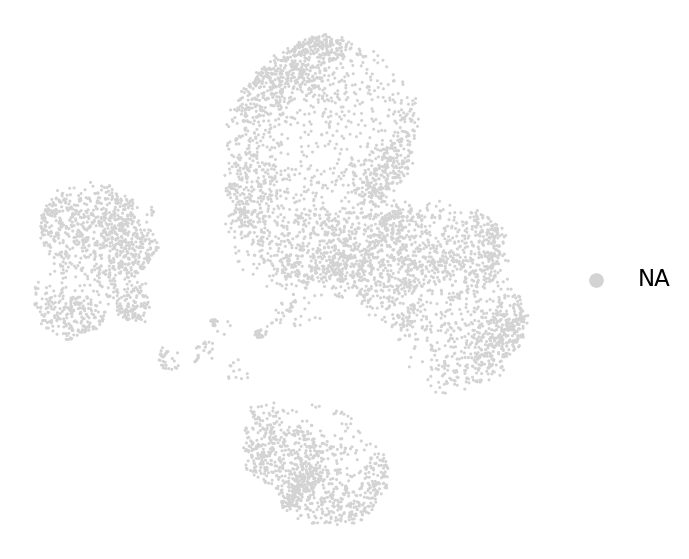

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


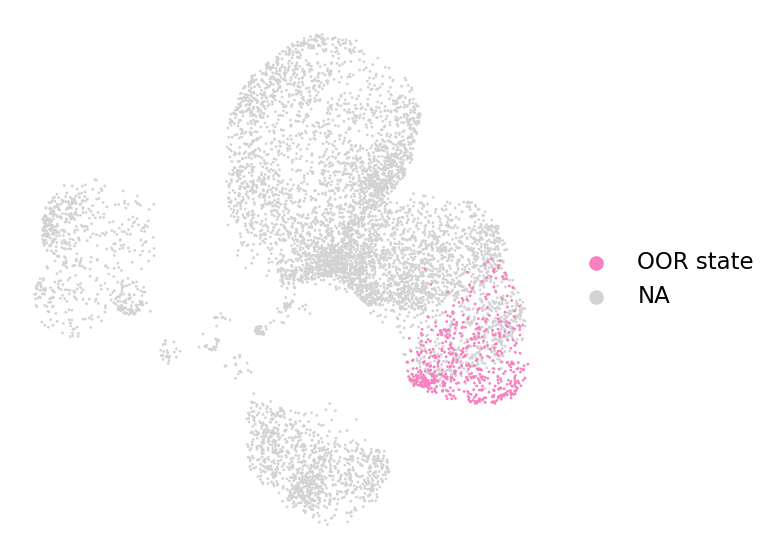

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


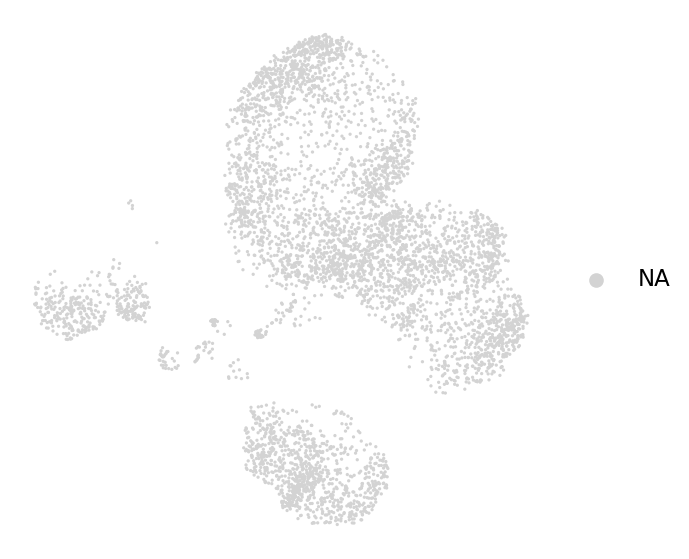

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


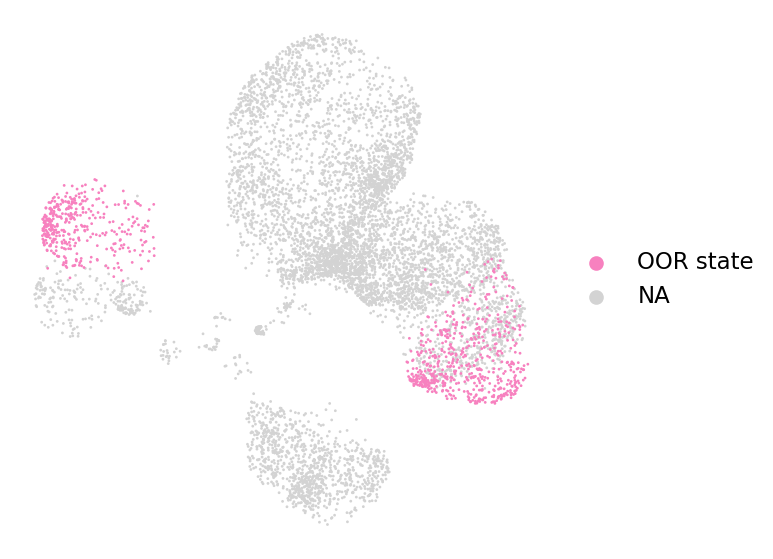

In [188]:
outdir = '/lustre/scratch117/cellgen/team205/ed6/PBMC_CZI_integration_filtered/tmp/'
population_obs = 'cell_type'
batch_obs = 'dataset_id'

perturb_pop='natural_killer_cell'
shift_dir = [x for x in os.listdir(outdir) if x.startswith(f'qPBMC_500cells_demo_shift_cell_type{perturb_pop}') and x.endswith("seed2022")][0]
remove_dir = [x for x in os.listdir(outdir) if x.startswith(f'qPBMC_500cells_demo_perturb_cell_type{perturb_pop}') and x.endswith("seed2022")][0]
mixed_dir = [x for x in os.listdir(outdir) if x.startswith(f'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_{perturb_pop}') and x.endswith("seed2022")][0]

plt.rcParams['figure.figsize'] = [7,7]
for simdir in [remove_dir, shift_dir, mixed_dir]:
    adata = milopy.utils.read_milo_adata(outdir + simdir + '/ACR_design.scArches_milo.h5ad', backed=False)
#     sc.tl.umap(adata)
#     sc.pl.umap(adata, color='OOR_state')
#     milopy.utils.build_nhood_graph(adata)
#     milopy.plot.plot_nhood_graph(adata, min_size=0.5, alpha=1)
    adata.obs['plot_oor_state'] = np.where(adata.obs['OOR_state'] == 1, 'OOR state', np.nan)
    oor_palette = {"OOR state":'#f781bf', 'nan':'lightgrey'} 
    if simdir == remove_dir:
        p='remove'
    elif simdir == 'shift_dir':
        p='shift'
    else:
        p='mixed'
    sc.pl.umap(adata[adata.obs['dataset_group'] == 'ctrl'], color=['plot_oor_state'], groups=['OOR state', 'not OOR state'], 
            palette=oor_palette, frameon=False, title='', save=f'example_perturb_{p}.ctrl.png')
    sc.pl.umap(adata[adata.obs['dataset_group'] == 'query'], color=['plot_oor_state'], 
           groups=['OOR state', 'not OOR state'], palette=oor_palette, frameon=False, title='', save=f'example_perturb_{p}.query.png')

In [154]:
adata = adata.to_memory()

In [168]:
adata.obs['plot_oor_state'] = np.where(adata.obs['cell_annotation'].isin(['classical_monocyte', perturb_pop]), 'OOR state', np.nan)


10_1038_s41591_021_01329_2-CTGTTTATCATGTCCC-MH8919227     True
10_1038_s41591_021_01329_2-ACGAGCCAGCTAAACA-MH8919227     True
10_1038_s41591_021_01329_2-TTCTCCTGTTCACGGC-MH8919227     True
10_1038_s41591_021_01329_2-AAAGTAGTCCTGCTTG-MH8919227     True
10_1038_s41591_021_01329_2-ACATGGTCATCAGTCA-MH8919227     True
                                                         ...  
10_1038_s41591_021_01329_2-CTAATGGGTATAATGG-MH8919278    False
10_1038_s41591_021_01329_2-TACTTGTTCTAACTGG-MH8919278    False
10_1038_s41591_021_01329_2-ATAGACCCAATCTACG-MH8919278     True
10_1038_s41591_021_01329_2-GACGTTAAGACTTGAA-MH8919278     True
10_1038_s41591_021_01329_2-BGCV13_GTATCTTTCGGATGTT-1     False
Name: plot_oor_state, Length: 12929, dtype: bool

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


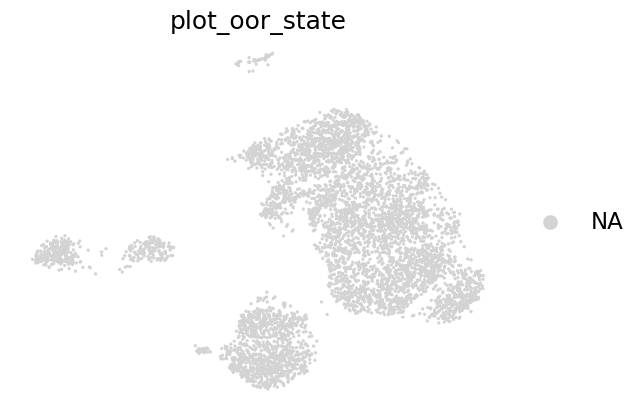

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


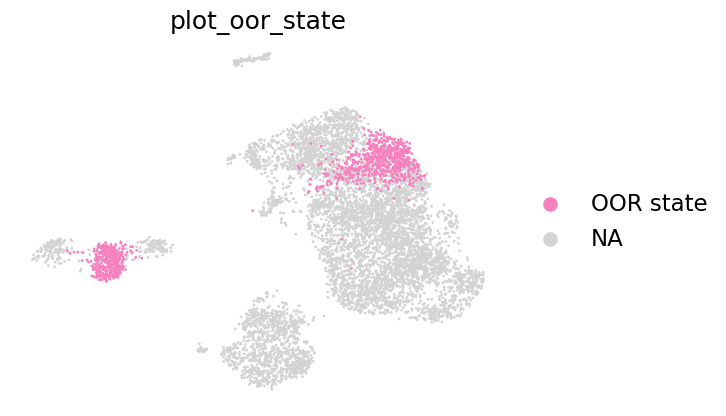

## Check output

In [286]:
outdir = '/lustre/scratch117/cellgen/team205/ed6/PBMC_CZI_integration_filtered/tmp/'
population_obs = 'cell_type'
batch_obs = 'dataset_id'

In [287]:
dirs = [x for x in os.listdir(outdir) if x.startswith("qPBMC_500cells_demo_mixed")]

In [288]:
dirs

['qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_CD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_thymus_derived_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_central_memory_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_effector_memory_CD8_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_natural_killer_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022']

In [301]:
simdir = dirs[3]

In [302]:
simdir

'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_central_memory_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022'

In [313]:
adata = milopy.utils.read_milo_adata(outdir + simdir + '/ACR_design.scArches_milo.h5ad', backed=True)

In [314]:
adata.uns['nhood_adata'] = adata.uns['nhood_adata'].to_memory()

In [315]:
sc.tl.umap(adata)

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


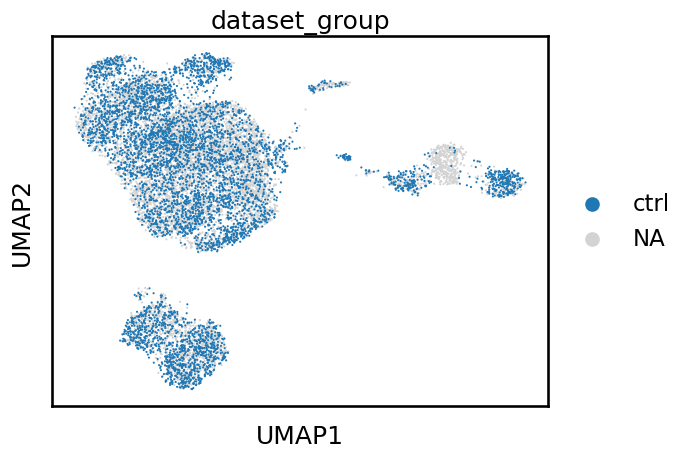

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


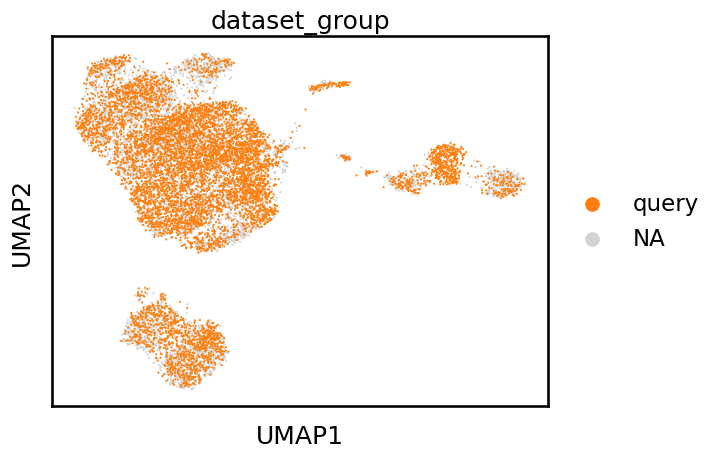

In [316]:
sc.pl.umap(adata, color=[ 'dataset_group'], groups=['ctrl'])
sc.pl.umap(adata, color=[ 'dataset_group'], groups=['query'])

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


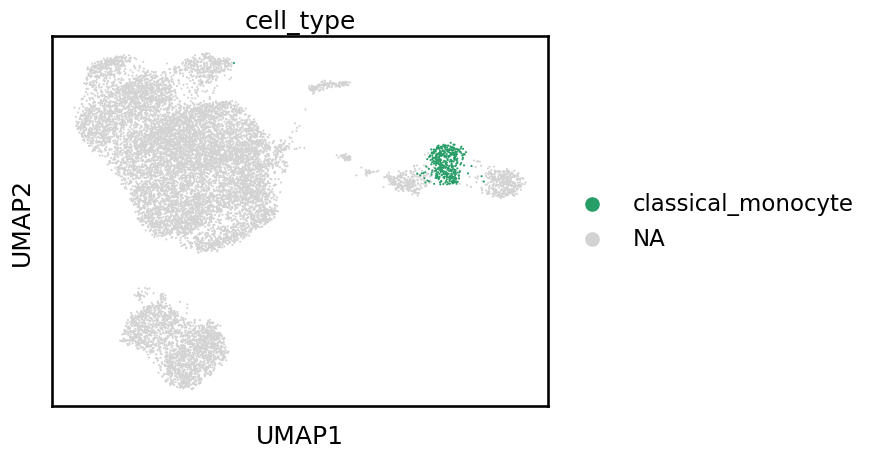

In [317]:
sc.pl.umap(adata, color=['cell_type'], groups='classical_monocyte')

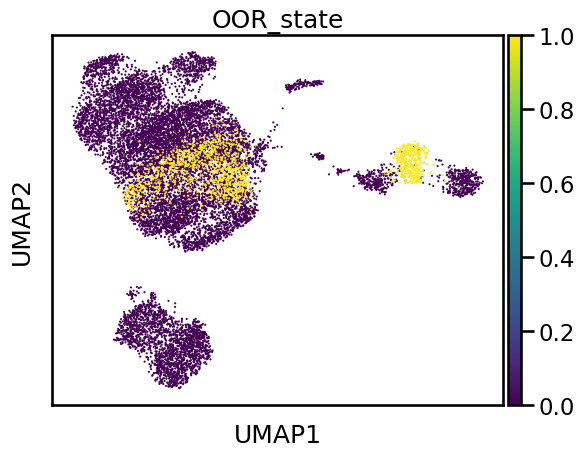

In [318]:
sc.pl.umap(adata, color='OOR_state')

In [311]:
perturb_pop = adata.obs.loc[adata.obs['OOR_state'] == 1, 'cell_type'].unique()
perturb_pop_remove = 'classical_monocyte'
perturb_pop_shift = perturb_pop[perturb_pop != 'classical_monocyte'][0]
adata.obs['OOR_state_remove'] = np.where((adata.obs['OOR_state'] == 1) & (adata.obs['cell_type'] == perturb_pop_remove), 1, 0)
adata.obs['OOR_state_shift'] = np.where((adata.obs['OOR_state'] == 1) & (adata.obs['cell_type'] == perturb_pop_shift), 1, 0)

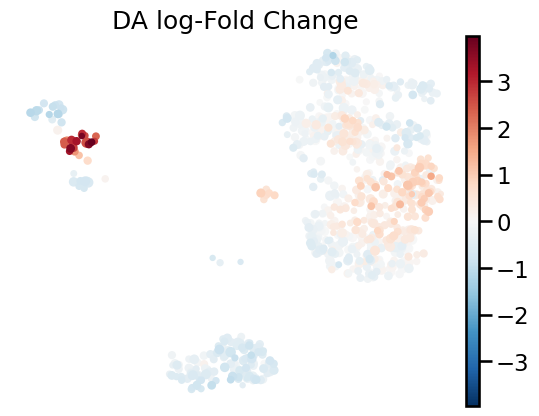

In [312]:
milopy.utils.build_nhood_graph(adata)
milopy.plot.plot_nhood_graph(adata, min_size=0.5, alpha=1)

In [448]:
from oor_benchmark.metrics import FDR_TPR_FPR
from oor_benchmark.metrics import auprc

def harmonize_output(adata, signif_alpha=0.1):
#     if adata.isbacked:
#         sample_adata = adata.uns['nhood_adata'].to_memory().T
#     else:
    sample_adata = adata.uns["nhood_adata"].T.copy()
    sample_adata.var["OOR_score"] = sample_adata.var["logFC"].copy()
    sample_adata.var["OOR_signif"] = (
        ((sample_adata.var["SpatialFDR"] < signif_alpha) &
         (sample_adata.var["logFC"] > 0)).astype(int).copy()
    )
    sample_adata.varm["groups"] = adata.obsm["nhoods"].T
    adata.uns["sample_adata"] = sample_adata.copy()
    
def parse_design(adata, ref_design, embedding_method):
    if 'sample_adata' not in adata.uns:
        harmonize_output(adata)
    perturb_pop = adata.obs['OOR_state_name'].unique()[0]
    tpr_df = FDR_TPR_FPR.FDR_TPR_FPR(adata)
    auprc_df = auprc.auprc(adata, return_curve=True)
    nhoods_df = adata.uns['sample_adata'].var.copy()
    tpr_df['design'] = ref_design
    tpr_df['embedding_method'] = embedding_method
    tpr_df['OOR_state_name'] = perturb_pop
    auprc_df['design'] = ref_design
    auprc_df['embedding_method'] = embedding_method
    auprc_df['OOR_state_name'] = perturb_pop
    nhoods_df['design'] = ref_design
    nhoods_df['embedding_method'] = embedding_method
    nhoods_df['OOR_state_name'] = perturb_pop
    return(nhoods_df, tpr_df, auprc_df)


In [449]:
from oor_benchmark.metrics.utils import make_OOR_per_group

In [450]:
# adata.obs['OOR_state'] = adata.obs['OOR_state_shift'].copy()
adata.obs['OOR_state_name'] = perturb_pop_remove
if 'sample_adata' in adata.uns:
    del adata.uns['sample_adata']
nh_df, all_tpr_df, all_auprc_df = parse_design(adata, 'CR', 'scArches')

adata.obs['OOR_state'] = adata.obs['OOR_state_shift'].copy()
adata.obs['OOR_state_name'] = perturb_pop_shift
del adata.uns['sample_adata']
shift_nh_df, shift_tpr_df, shift_auprc_df = parse_design(adata, 'CR', 'scArches')

adata.obs['OOR_state'] = adata.obs['OOR_state_remove'].copy()
adata.obs['OOR_state_name'] = perturb_pop_remove
del adata.uns['sample_adata']
remove_nh_df, remove_tpr_df, remove_auprc_df = parse_design(adata, 'CR', 'scArches')

In [451]:
nh_df['frac_OOR_cells_shift'] = shift_nh_df['frac_OOR_cells']
nh_df['frac_OOR_cells_remove'] = remove_nh_df['frac_OOR_cells']

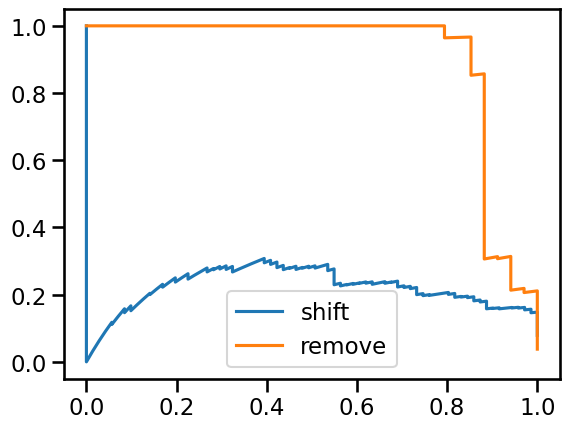

In [452]:
plt.plot(shift_auprc_df.Recall, shift_auprc_df.Precision, label='shift');
plt.plot(remove_auprc_df.Recall, remove_auprc_df.Precision, label='remove');
plt.legend()

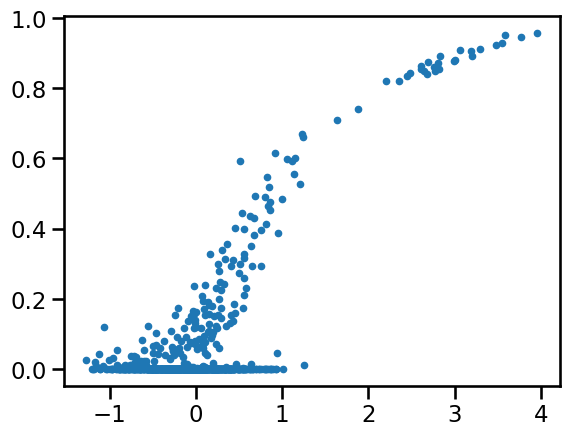

In [453]:
plt.plot(nh_df['OOR_score'], nh_df['frac_OOR_cells'],'.');

<AxesSubplot: xlabel='OOR_score', ylabel='frac_OOR_cells'>

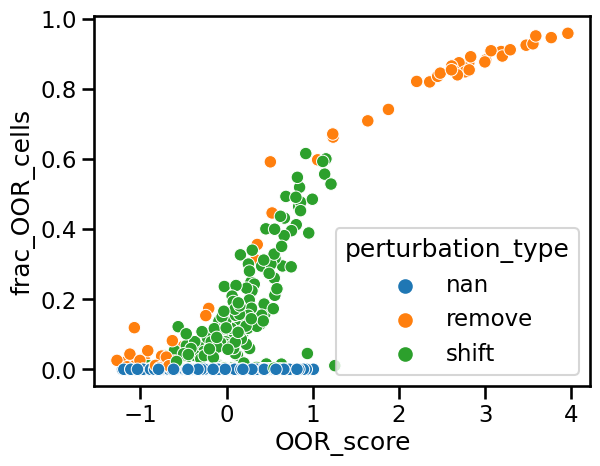

In [454]:
nh_df['perturbation_type'] = np.where(nh_df['frac_OOR_cells_shift'] > 0, 'shift', np.where(nh_df['frac_OOR_cells_remove'] > 0, 'remove', np.nan))
sns.scatterplot(data=nh_df, x='OOR_score', y='frac_OOR_cells', hue='perturbation_type')

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [471]:
def get_FDR_TPR_plot(nh_df):
#     fdrs = np.arange(0,1.01, 0.01)
    fdrs = np.linspace(min(nh_df.logFC),max(nh_df.logFC), 100)
    tprs = []
    for t in fdrs:
        tot_positives = sum(nh_df['OOR_state_group'])
        tpr = sum((nh_df['logFC'] < t) & (nh_df['OOR_state_group'] == 1))/tot_positives
        tprs.append(tpr)
    return(pd.DataFrame(np.vstack([fdrs, tprs]).T, columns=["FDR", "TPR"]))

In [474]:
nh_df_scvi = nhoods_res_df_all[(nhoods_res_df_all['design'] == 'CR scVI') & (nhoods_res_df_all.OOR_state_name == 'classical_monocyte_naive_B_cell')]
nh_df_acr = nhoods_res_df_all[(nhoods_res_df_all['design'] == 'ACR') & (nhoods_res_df_all.OOR_state_name == 'classical_monocyte_naive_B_cell')]

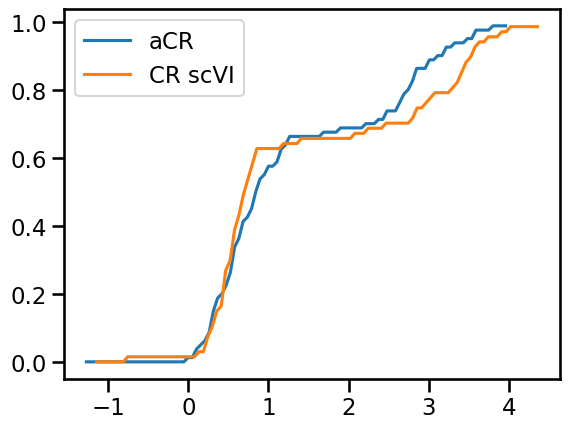

In [475]:
plt.plot(get_FDR_TPR_plot(nh_df_acr).FDR, get_FDR_TPR_plot(nh_df_acr).TPR, label='aCR')
plt.plot(get_FDR_TPR_plot(nh_df_scvi).FDR, get_FDR_TPR_plot(nh_df_scvi).TPR, label='CR scVI');
plt.legend()


## Read output - shift

In [223]:
outdir = '/lustre/scratch117/cellgen/team205/ed6/PBMC_CZI_integration_filtered/tmp/'
population_obs = 'cell_type'
batch_obs = 'dataset_id'

In [224]:
nhoods_res_df_all = pd.DataFrame()
tpr_res_df_all = pd.DataFrame()
for d in [d for d in os.listdir(outdir) if d.endswith('_seed2022') and d.startswith('qPBMC_500cells_demo_shift')]:
    diff_method = 'milo'
    print(f'Reading {d}')
    nhoods_res_df = pd.read_csv(outdir + d + f'/nhoods_obs.{diff_method}.csv', index_col = 0)
    nhoods_res_df_all = pd.concat([nhoods_res_df_all, nhoods_res_df])
    tpr_res_df = pd.read_csv(outdir + d + f'/TPR_res.{diff_method}.csv', index_col = 0)
    tpr_res_df_all = pd.concat([tpr_res_df_all, tpr_res_df])

Reading qPBMC_500cells_demo_shift_cell_typeeffector_memory_CD8_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typeCD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typeclassical_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typenaive_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typecentral_memory_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typenatural_killer_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typenaive_thymus_derived_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022


In [225]:
nhoods_res_df_all = nhoods_res_df_all[nhoods_res_df_all.OOR_state_name != 'neutrophil']
tpr_res_df_all = tpr_res_df_all[tpr_res_df_all.OOR_state_name != 'neutrophil']

nhoods_res_df_all['perturb_pop_pl'] = [short_pop_names[x] for x in nhoods_res_df_all['OOR_state_name']]
tpr_res_df_all['perturb_pop_pl'] = [short_pop_names[x] for x in tpr_res_df_all['OOR_state_name']]

## Keep 4 designs
nhoods_res_df_all['design'] = np.where(nhoods_res_df_all['design'] == 'CR', nhoods_res_df_all['design'] + ' ' + nhoods_res_df_all['embedding_method'], nhoods_res_df_all['design'])
tpr_res_df_all['design'] = np.where(tpr_res_df_all['design'] == 'CR', tpr_res_df_all['design'] + ' ' + tpr_res_df_all['embedding_method'], tpr_res_df_all['design'])

nhoods_res_df_all = nhoods_res_df_all[nhoods_res_df_all['design'].isin(["ACR", 'AR', 'CR scVI', 'CR scArches'])].copy()
nhoods_res_df_all = nhoods_res_df_all[~((nhoods_res_df_all['design'] == 'ACR') & (nhoods_res_df_all['embedding_method'] == 'scVI'))]
tpr_res_df_all = tpr_res_df_all[tpr_res_df_all['design'].isin(["ACR", 'AR', 'CR scVI', 'CR scArches'])].copy()
tpr_res_df_all = tpr_res_df_all[~((tpr_res_df_all['design'] == 'ACR') & (tpr_res_df_all['embedding_method'] == 'scVI'))]

In [226]:
nhoods_res_df_all

index_cell  kth_distance  \
0      10_1038_s41591_021_01329_2-GTCATTTGTACGACCC-MH...      2.021679   
1      10_1038_s41591_021_01329_2-CACAGGCCAGATGGCA-MH...      1.873992   
2      10_1038_s41591_021_01329_2-CAACCTCTCAGGTAAA-MH...      1.588131   
3      10_1038_s41591_021_01329_2-CAAGAAAAGAGACTTA-MH...      1.447421   
4      10_1038_s41591_021_01329_2-CATGCCTGTTGCTCCT-MH...      1.618477   
...                                                  ...           ...   
42574  10_1038_s41591_021_01329_2-CAGTAACGTGACCAAG-MH...      1.037810   
42575  10_1038_s41591_021_01329_2-GTATCTTCAAGTTAAG-MH...      0.940363   
42576  10_1038_s41591_021_01329_2-CGTGTCTGTTTCCACC-MH...      1.084558   
42577  10_1038_s41591_021_01329_2-CATGGCGAGACGACGT-MH...      1.631427   
42578  10_1038_s41591_021_01329_2-ACATCAGCACACCGCA-MH...      1.203338   

                                     nhood_annotation  nhood_annotation_frac  \
0                                  classical_monocyte               0.727891   
1                     CD14_low_CD16_positive_monocyte               1.000000   
2                                 natural_killer_cell               0.926605   
3                                  classical_monocyte               0.961353   
4                                 natural_killer_cell               0.744186   
...                                               ...                    ...   
42574  effector_memory_CD8_positive_alpha_beta_T_cell               0.967836   
42575  effector_memory_CD8_positive_alpha_beta_T_cell               0.794203   
42576   central_memory_CD4_positive_alpha_beta_T_cell               0.507692   
42577                                   memory_B_cell               0.980583   
42578  effector_memory_CD8_positive_alpha_beta_T_cell               0.829630   

          logFC     logCPM          F    PValue       FDR  SpatialFDR  \
0     -1.069590  10.024462   2.884873  0.094171  0.684030    0.660134   
1     -0.632406  10.293442   0.693443  0.408028  0.996999    0.996844   
2      0.501752  10.291254   0.935363  0.337013  0.996999    0.996844   
3     -1.747880  11.222851   6.532818  0.012923  0.153094    0.143175   
4      0.426012  10.499907   0.764500  0.385093  0.996999    0.996844   
...         ...        ...        ...       ...       ...         ...   
42574  0.327169   7.569310   0.578169  0.469333  0.660488    0.661339   
42575  0.321325   7.570505   0.561218  0.481206  0.669912    0.670678   
42576  0.180514   7.559858   0.175109  0.695324  0.826964    0.827402   
42577  1.240980   7.555262  11.170926  0.001325  0.021258    0.021248   
42578  1.460688   7.535379  17.096394  0.000108  0.004143    0.004349   

       OOR_score  OOR_signif  n_OOR_cells  frac_OOR_cells  OOR_state_group  \
0      -1.069590           0          0.0        0.000000                0   
1      -0.632406           0          0.0        0.000000                0   
2       0.501752           0          2.0        0.006803                0   
3      -1.747880           0          0.0        0.000000                0   
4       0.426012           0         37.0        0.109792                0   
...          ...         ...          ...             ...              ...   
42574   0.327169           0          0.0        0.000000                0   
42575   0.321325           0          0.0        0.000000                0   
42576   0.180514           0          0.0        0.000000                0   
42577   1.240980           1          0.0        0.000000                0   
42578   1.460688           1          0.0        0.000000                0   

      design embedding_method  \
0        ACR         scArches   
1        ACR         scArches   
2        ACR         scArches   
3        ACR         scArches   
4        ACR         scArches   
...      ...              ...   
42574     AR         scArches   
42575     AR         scArches   
42576     AR         scArches   
42577     AR         scArches   
42578     AR       

In [103]:
%%R -i nhoods_res_df_all
head(nhoods_res_df_all)

                                             index_cell kth_distance
1 10_1038_s41591_021_01329_2-GTCATTTGTACGACCC-MH8919227     2.021679
2 10_1038_s41591_021_01329_2-CACAGGCCAGATGGCA-MH8919227     1.873992
3 10_1038_s41591_021_01329_2-CAACCTCTCAGGTAAA-MH8919227     1.588131
4 10_1038_s41591_021_01329_2-CAAGAAAAGAGACTTA-MH8919227     1.447421
5 10_1038_s41591_021_01329_2-CATGCCTGTTGCTCCT-MH8919227     1.618477
6 10_1038_s41591_021_01329_2-TCAGCAAAGGTCATCT-MH8919227     1.521960
                 nhood_annotation nhood_annotation_frac      logFC   logCPM
1              classical_monocyte             0.7278912 -1.0695898 10.02446
2 CD14_low_CD16_positive_monocyte             1.0000000 -0.6324058 10.29344
3             natural_killer_cell             0.9266055  0.5017515 10.29125
4              classical_monocyte             0.9613527 -1.7478805 11.22285
5             natural_killer_cell             0.7441860  0.4260122 10.49991
6             natural_killer_cell             0.9932432  0.30

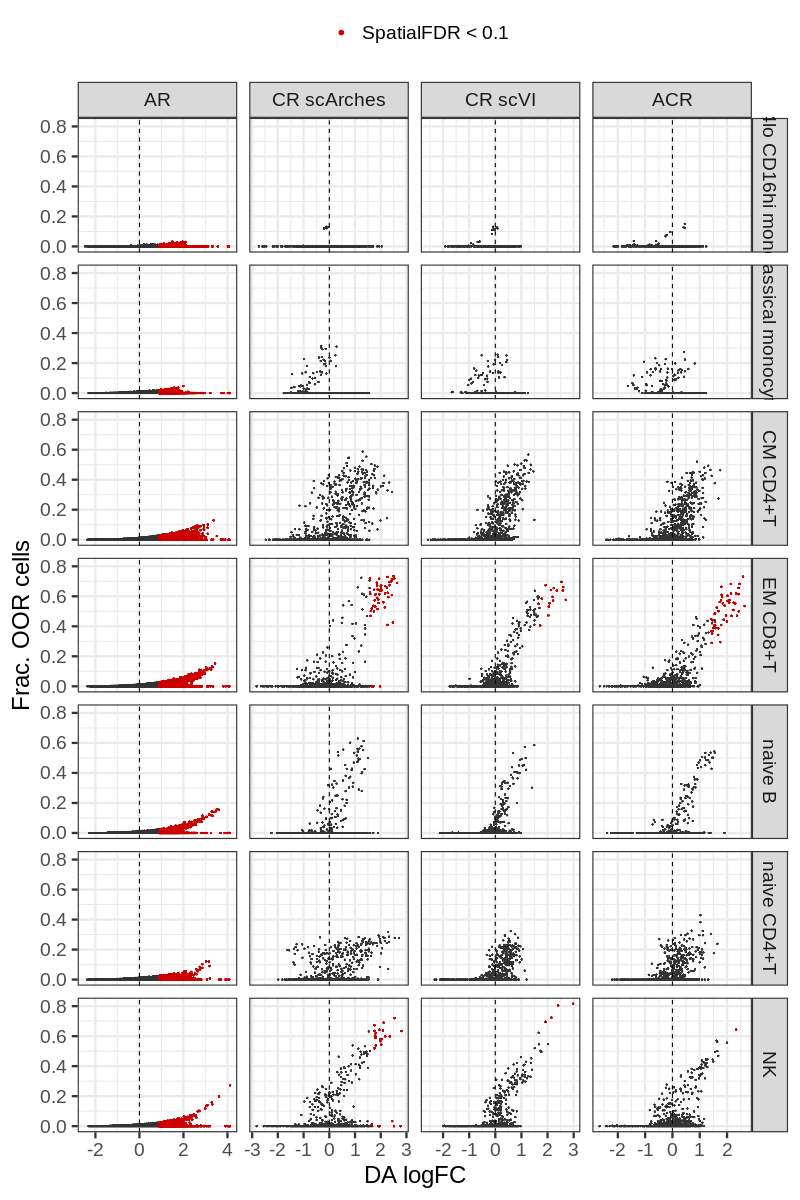

In [104]:
%%R -h 1200 -w 800
nhoods_res_df_all %>%
    mutate(design=factor(design, levels=c('AR', 'CR scArches', 'CR scVI','ACR'))) %>%
    ggplot(aes(OOR_score, frac_OOR_cells)) +
    rasterise(geom_point(size=0.3, color='grey20'), dpi=300) +
    rasterise(geom_point(data=. %>% filter(OOR_signif == 1), aes(color='SpatialFDR < 0.1'),
               size=0.4), dpi=300) +
    facet_grid(perturb_pop_pl~design, scales='free_x') +
    guides(color=guide_legend(title='', override.aes = list(size=2))) +
    theme_bw(base_size=24) +
    scale_color_manual(values = c(`SpatialFDR < 0.1` = 'red3')) +
    geom_vline(xintercept=0, linetype=2) +
    xlab('DA logFC') + ylab('Frac. OOR cells') +
    theme(legend.position='top') 

In [105]:
tpr_res_df_all

TP    FP   FN     TN       TPR       FPR       FDR       design  \
0   48     0   52    824  0.480000  0.000000  0.000000          ACR   
0   44     4   46    858  0.488889  0.004640  0.083333  CR scArches   
0   16     0   87    814  0.155340  0.000000  0.000000      CR scVI   
0  314  3292    0  41432  1.000000  0.073607  0.912923           AR   
0    0     0    8    979  0.000000  0.000000  0.000000          ACR   
0    0     0    6    998  0.000000  0.000000  0.000000  CR scArches   
0    0     0   12    950  0.000000  0.000000  0.000000      CR scVI   
0   72  3398   25  45545  0.742268  0.069428  0.979251           AR   
0    0     0   48    891  0.000000  0.000000  0.000000          ACR   
0    0     0   34    940  0.000000  0.000000  0.000000  CR scArches   
0    0     0   38    932  0.000000  0.000000  0.000000      CR scVI   
0  111  3267  134  44441  0.453061  0.068479  0.967140           AR   
0    0     0   63    904  0.000000  0.000000  0.000000          ACR   
0    0     0   63    926  0.000000  0.000000  0.000000  CR scArches   
0    0     0   67    906  0.000000  0.000000  0.000000      CR scVI   
0  156  3215    0  45343  1.000000  0.066209  0.953723           AR   
0    0     0  259    673  0.000000  0.000000  0.000000          ACR   
0    0     0  251    754  0.000000  0.000000  0.000000  CR scArches   
0    0     0  244    723  0.000000  0.000000  0.000000      CR scVI   
0  329  3670    7  39865  0.979167  0.084300  0.917729           AR   
0    1     0   90    833  0.010989  0.000000  0.000000          ACR   
0   20     6   98    843  0.169492  0.007067  0.230769  CR scArches   
0    4     0   90    855  0.042553  0.000000  0.000000      CR scVI   
0   29  3175    0  44301  1.000000  0.066876  0.990949           AR   
0    0     0  154    801  0.000000  0.000000  0.000000          ACR   
0    0     0  200    779  0.000000  0.000000  0.000000  CR scArches   
0    0     0  175    781  0.000000  0.000000  0.000000      CR scVI   
0   97  3700    2  38780  0.979798  0.087100  0.974454           AR   

  embedding_method                                     OOR_state_name  \
0         scArches     effector_memory_CD8_positive_alpha_beta_T_cell   
0         scArches     effector_memory_CD8_positive_alpha_beta_T_cell   
0             scVI     effector_memory_CD8_positive_alpha_beta_T_cell   
0         scArches     effector_memory_CD8_positive_alpha_beta_T_cell   
0         scArches                    CD14_low_CD16_positive_monocyte   
0         scArches                    CD14_low_CD16_positive_monocyte   
0             scVI                    CD14_low_CD16_positive_monocyte   
0         scArches                    CD14_low_CD16_positive_monocyte   
0         scArches                                 classical_monocyte   
0         scArches                                 classical_monocyte   
0             scVI                                 classical_monocyte   
0         scArches                                 classical_monocyte   
0         scArches                                       naive_B_cell   
0         scArches                                       naive_B_cell   
0             scVI                                       naive_B_cell   
0         scArches                                       naive_B_cell   
0         scArches      central_memory_CD4_positive_alpha_beta_T_cell   
0         scArches      central_memory_CD4_positive_alpha_beta_T_cell   
0             scVI      central_memory_CD4_positive_alpha_beta_T_cell   
0         scArches      central_memory_CD4_positive_alpha_beta_T_cell   
0         scArches                                natural_killer_cell   
0         scArches                                natural_killer_cell   
0             scVI                                natural_killer_cell   
0         scArches                                natural_killer_cell   
0         scArches  naive_thymus_derived_CD4_positive_alpha_beta_T...   
0         scArches  naive_thymus_derived_CD4_p

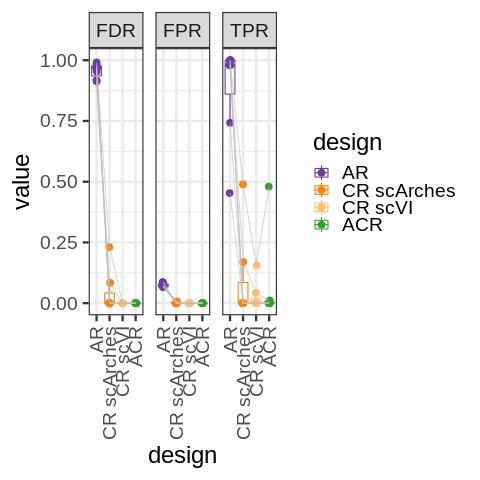

In [227]:
%%R -i tpr_res_df_all
pl2 <- tpr_res_df_all %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
    pivot_longer(cols=c("TPR", 'FDR', 'FPR'), names_to='metric') %>%
    ggplot(aes(design, value, color=design)) +
    geom_boxplot(outlier.alpha=0) +
    geom_jitter(size=3, width=0.05) +
    geom_line(aes(group=OOR_state_name), color='grey', alpha=0.6) +
    facet_wrap(metric~.) +
    scale_color_manual(values=design_palette) +
    theme_bw(base_size=24) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5)) 
    
pl2 

In [228]:
auprc_res_df_all = pd.DataFrame()
for d in [d for d in os.listdir(outdir) if d.endswith('_seed2022') and d.startswith('qPBMC_500cells_demo_shift')]:
    diff_method = 'milo'
    if 'neutrophil' not in d:
        print(f'Reading {d}')
        print(f'Reading {d}')
        auprc_res_df = pd.read_csv(outdir + d + f'/AUPRC_res.{diff_method}.csv', index_col = 0)
        auprc_res_df_all = pd.concat([auprc_res_df_all, auprc_res_df])


Reading qPBMC_500cells_demo_shift_cell_typeeffector_memory_CD8_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typeeffector_memory_CD8_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typeCD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typeCD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typeclassical_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typeclassical_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typenaive_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_shift_cell_typenaive_B_cell_queryBatchdataset_id10_1038_s41591_021_013

In [229]:
# auprc_res_df = auprc_res_df_all[['OOR_state_name', 'design', 'AUPRC', 'no_skill_thresh', 'embedding_method']].drop_duplicates()
auprc_res_df = auprc_res_df_all

## Keep 4 designs
auprc_res_df['design'] = np.where(auprc_res_df['design']=='CR', auprc_res_df['design'] + ' ' + auprc_res_df['embedding_method'], auprc_res_df['design'])
auprc_res_df = auprc_res_df[auprc_res_df['design'].isin(["ACR", 'AR', 'CR scVI', 'CR scArches'])].copy()
auprc_res_df = auprc_res_df[~((auprc_res_df['design'] == 'ACR') & (auprc_res_df['embedding_method'] == 'scVI'))]

In [230]:
%%R -i auprc_res_df
head(auprc_res_df)

  Recall Precision     AUPRC no_skill_thresh design embedding_method
1      1 0.1082251 0.8651261       0.1082251    ACR         scArches
2      1 0.1083424 0.8651261       0.1082251    ACR         scArches
3      1 0.1084599 0.8651261       0.1082251    ACR         scArches
4      1 0.1085776 0.8651261       0.1082251    ACR         scArches
5      1 0.1086957 0.8651261       0.1082251    ACR         scArches
6      1 0.1088139 0.8651261       0.1082251    ACR         scArches
                                  OOR_state_name
1 effector_memory_CD8_positive_alpha_beta_T_cell
2 effector_memory_CD8_positive_alpha_beta_T_cell
3 effector_memory_CD8_positive_alpha_beta_T_cell
4 effector_memory_CD8_positive_alpha_beta_T_cell
5 effector_memory_CD8_positive_alpha_beta_T_cell
6 effector_memory_CD8_positive_alpha_beta_T_cell


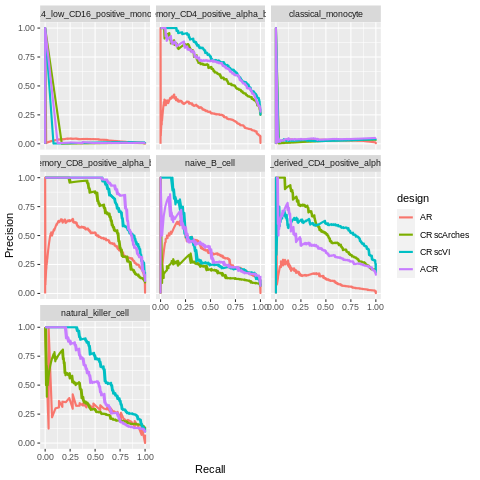

In [231]:
%%R
auprc_res_df %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
#     pivot_longer(cols=c("AUPRC"), names_to='metric') %>%
    ggplot(aes(Recall, Precision, color=design)) +
    geom_line(size=1) +
    facet_wrap(OOR_state_name~.)

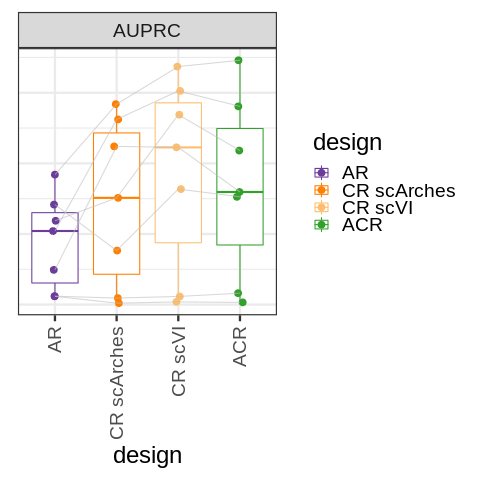

In [233]:
%%R
pl2 <- auprc_res_df %>%
    distinct(AUPRC, OOR_state_name, design) %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
    pivot_longer(cols=c("AUPRC"), names_to='metric') %>%
    ggplot(aes(design, value, color=design)) +
    geom_boxplot(outlier.alpha=0) +
    geom_jitter(size=3, width=0.05) +
    geom_line(aes(group=OOR_state_name), color='grey', alpha=0.6) +
    facet_wrap(metric~.) +
    scale_color_manual(values=design_palette) +
    theme_bw(base_size=24) +
    remove_y_axis() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5)) 
    
pl2 

In [112]:
nhoods_res_df_all

index_cell  kth_distance  \
0      10_1038_s41591_021_01329_2-GTCATTTGTACGACCC-MH...      2.021679   
1      10_1038_s41591_021_01329_2-CACAGGCCAGATGGCA-MH...      1.873992   
2      10_1038_s41591_021_01329_2-CAACCTCTCAGGTAAA-MH...      1.588131   
3      10_1038_s41591_021_01329_2-CAAGAAAAGAGACTTA-MH...      1.447421   
4      10_1038_s41591_021_01329_2-CATGCCTGTTGCTCCT-MH...      1.618477   
...                                                  ...           ...   
42574  10_1038_s41591_021_01329_2-CAGTAACGTGACCAAG-MH...      1.037810   
42575  10_1038_s41591_021_01329_2-GTATCTTCAAGTTAAG-MH...      0.940363   
42576  10_1038_s41591_021_01329_2-CGTGTCTGTTTCCACC-MH...      1.084558   
42577  10_1038_s41591_021_01329_2-CATGGCGAGACGACGT-MH...      1.631427   
42578  10_1038_s41591_021_01329_2-ACATCAGCACACCGCA-MH...      1.203338   

                                     nhood_annotation  nhood_annotation_frac  \
0                                  classical_monocyte               0.727891   
1                     CD14_low_CD16_positive_monocyte               1.000000   
2                                 natural_killer_cell               0.926605   
3                                  classical_monocyte               0.961353   
4                                 natural_killer_cell               0.744186   
...                                               ...                    ...   
42574  effector_memory_CD8_positive_alpha_beta_T_cell               0.967836   
42575  effector_memory_CD8_positive_alpha_beta_T_cell               0.794203   
42576   central_memory_CD4_positive_alpha_beta_T_cell               0.507692   
42577                                   memory_B_cell               0.980583   
42578  effector_memory_CD8_positive_alpha_beta_T_cell               0.829630   

          logFC     logCPM          F    PValue       FDR  SpatialFDR  \
0     -1.069590  10.024462   2.884873  0.094171  0.684030    0.660134   
1     -0.632406  10.293442   0.693443  0.408028  0.996999    0.996844   
2      0.501752  10.291254   0.935363  0.337013  0.996999    0.996844   
3     -1.747880  11.222851   6.532818  0.012923  0.153094    0.143175   
4      0.426012  10.499907   0.764500  0.385093  0.996999    0.996844   
...         ...        ...        ...       ...       ...         ...   
42574  0.327169   7.569310   0.578169  0.469333  0.660488    0.661339   
42575  0.321325   7.570505   0.561218  0.481206  0.669912    0.670678   
42576  0.180514   7.559858   0.175109  0.695324  0.826964    0.827402   
42577  1.240980   7.555262  11.170926  0.001325  0.021258    0.021248   
42578  1.460688   7.535379  17.096394  0.000108  0.004143    0.004349   

       OOR_score  OOR_signif  n_OOR_cells  frac_OOR_cells  OOR_state_group  \
0      -1.069590           0          0.0        0.000000                0   
1      -0.632406           0          0.0        0.000000                0   
2       0.501752           0          2.0        0.006803                0   
3      -1.747880           0          0.0        0.000000                0   
4       0.426012           0         37.0        0.109792                0   
...          ...         ...          ...             ...              ...   
42574   0.327169           0          0.0        0.000000                0   
42575   0.321325           0          0.0        0.000000                0   
42576   0.180514           0          0.0        0.000000                0   
42577   1.240980           1          0.0        0.000000                0   
42578   1.460688           1          0.0        0.000000                0   

      design embedding_method  \
0        ACR         scArches   
1        ACR         scArches   
2        ACR         scArches   
3        ACR         scArches   
4        ACR         scArches   
...      ...              ...   
42574     AR         scArches   
42575     AR         scArches   
42576     AR         scArches   
42577     AR         scArches   
42578     AR       

In [54]:
def get_FDR_TPR_plot(nh_df):
    fdrs = np.arange(0,1.01, 0.01)
#     fdrs = np.linspace(min(nh_df.logFC),max(nh_df.logFC), 100)
    tprs = []
    for t in fdrs:
        tot_positives = sum(nh_df['OOR_state_group'])
        tpr = sum((nh_df['SpatialFDR'] < t) & (nh_df['OOR_state_group'] == 1))/tot_positives
        fpr = sum((nh_df['SpatialFDR'] < t) & (nh_df['OOR_state_group'] != 1))/tot_positives
        tprs.append(tpr)
    return(pd.DataFrame(np.vstack([fdrs, tprs]).T, columns=["FDR", "TPR"]))

fdr_df_all = pd.DataFrame()
for ct in nhoods_res_df_all.perturb_pop_pl.unique():
    for d in nhoods_res_df_all.design.unique():
        nh_df = nhoods_res_df_all[(nhoods_res_df_all.perturb_pop_pl == ct) & (nhoods_res_df_all.design == d)].copy()
        if nh_df.shape[0] > 0:
            fdr_df = get_FDR_TPR_plot(nh_df)
            fdr_df['design'] = d
            fdr_df['perturb_pop_pl'] = ct
            fdr_df_all = pd.concat([fdr_df_all, fdr_df])

In [55]:
%%R -i fdr_df_all
head(fdr_df_all)

   FDR       TPR      design perturb_pop_pl
1 0.00 0.0000000 CR scArches       EM CD8+T
2 0.01 0.0000000 CR scArches       EM CD8+T
3 0.02 0.0000000 CR scArches       EM CD8+T
4 0.03 0.1666667 CR scArches       EM CD8+T
5 0.04 0.2777778 CR scArches       EM CD8+T
6 0.05 0.3000000 CR scArches       EM CD8+T


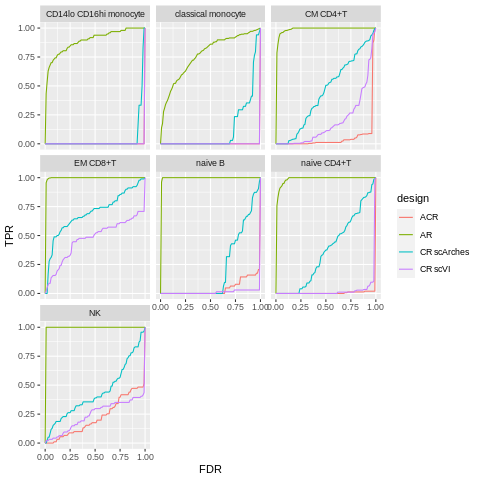

In [56]:
%%R
fdr_df_all %>%
ggplot(aes(FDR, TPR, color=design)) +
geom_line() +
facet_wrap(perturb_pop_pl~.)

## Read output - mixed

In [189]:
outdir = '/lustre/scratch117/cellgen/team205/ed6/PBMC_CZI_integration_filtered/tmp/'
population_obs = 'cell_type'
batch_obs = 'dataset_id'

In [190]:
nhoods_res_df_all = pd.DataFrame()
tpr_res_df_all = pd.DataFrame()
for d in [d for d in os.listdir(outdir) if d.endswith('_seed2022') and d.startswith('qPBMC_500cells_demo_mixed')]:
    diff_method = 'milo'
    print(f'Reading {d}')
    nhoods_res_df = pd.read_csv(outdir + d + f'/nhoods_obs.{diff_method}.csv', index_col = 0)
    nhoods_res_df_all = pd.concat([nhoods_res_df_all, nhoods_res_df])
    tpr_res_df = pd.read_csv(outdir + d + f'/TPR_res.{diff_method}.csv', index_col = 0)
    tpr_res_df_all = pd.concat([tpr_res_df_all, tpr_res_df])

Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_CD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_memory_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_thymus_derived_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_thymus_derived_CD8_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_central_memory_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_effector_memory_CD8_p

In [191]:
nhoods_res_df_all = nhoods_res_df_all[nhoods_res_df_all.OOR_state_name != 'neutrophil']
tpr_res_df_all = tpr_res_df_all[tpr_res_df_all.OOR_state_name != 'neutrophil']

nhoods_res_df_all['perturb_pop_pl'] = [short_pop_names[x.split("classical_monocyte_")[-1]] for x in nhoods_res_df_all['OOR_state_name']]
tpr_res_df_all['perturb_pop_pl'] = [short_pop_names[x.split('classical_monocyte_')[-1]] for x in tpr_res_df_all['OOR_state_name']]

## Keep 4 designs
nhoods_res_df_all['design'] = np.where(nhoods_res_df_all['design'] == 'CR', nhoods_res_df_all['design'] + ' ' + nhoods_res_df_all['embedding_method'], nhoods_res_df_all['design'])
tpr_res_df_all['design'] = np.where(tpr_res_df_all['design'] == 'CR', tpr_res_df_all['design'] + ' ' + tpr_res_df_all['embedding_method'], tpr_res_df_all['design'])

nhoods_res_df_all = nhoods_res_df_all[nhoods_res_df_all['design'].isin(["ACR", 'AR', 'CR scVI', 'CR scArches'])].copy()
nhoods_res_df_all = nhoods_res_df_all[~((nhoods_res_df_all['design'] == 'ACR') & (nhoods_res_df_all['embedding_method'] == 'scVI'))]
tpr_res_df_all = tpr_res_df_all[tpr_res_df_all['design'].isin(["ACR", 'AR', 'CR scVI', 'CR scArches'])].copy()
tpr_res_df_all = tpr_res_df_all[~((tpr_res_df_all['design'] == 'ACR') & (tpr_res_df_all['embedding_method'] == 'scVI'))]

In [192]:
%%R -i nhoods_res_df_all
head(nhoods_res_df_all)

                                             index_cell kth_distance
1 10_1038_s41591_021_01329_2-CCACGGACAAATACAG-MH8919227     1.841042
2 10_1038_s41591_021_01329_2-ACATGGTCATCAGTCA-MH8919227     1.570598
3 10_1038_s41591_021_01329_2-TGGGAAGGTATAGTAG-MH8919227     2.173805
4 10_1038_s41591_021_01329_2-CATTCGCAGAAGGTGA-MH8919227     1.459569
5  10_1038_s41591_021_01329_2-BGCV01_CGCCAAGGTTTGACAC-1     1.726617
6 10_1038_s41591_021_01329_2-GCGCAGTCACATCCGG-MH8919227     1.693379
     nhood_annotation nhood_annotation_frac       logFC    logCPM          F
1 natural_killer_cell             0.5668790 -0.50423124 10.473684 1.25907236
2 natural_killer_cell             0.9021739 -0.19109461 10.763748 0.16993867
3 natural_killer_cell             0.6969697  0.02412476  9.929305 0.00185461
4 natural_killer_cell             0.8578199  0.06508343 11.091623 0.01750008
5 natural_killer_cell             0.9166667  0.27044898 10.249232 0.31350747
6 natural_killer_cell             0.4503817  0.11804635

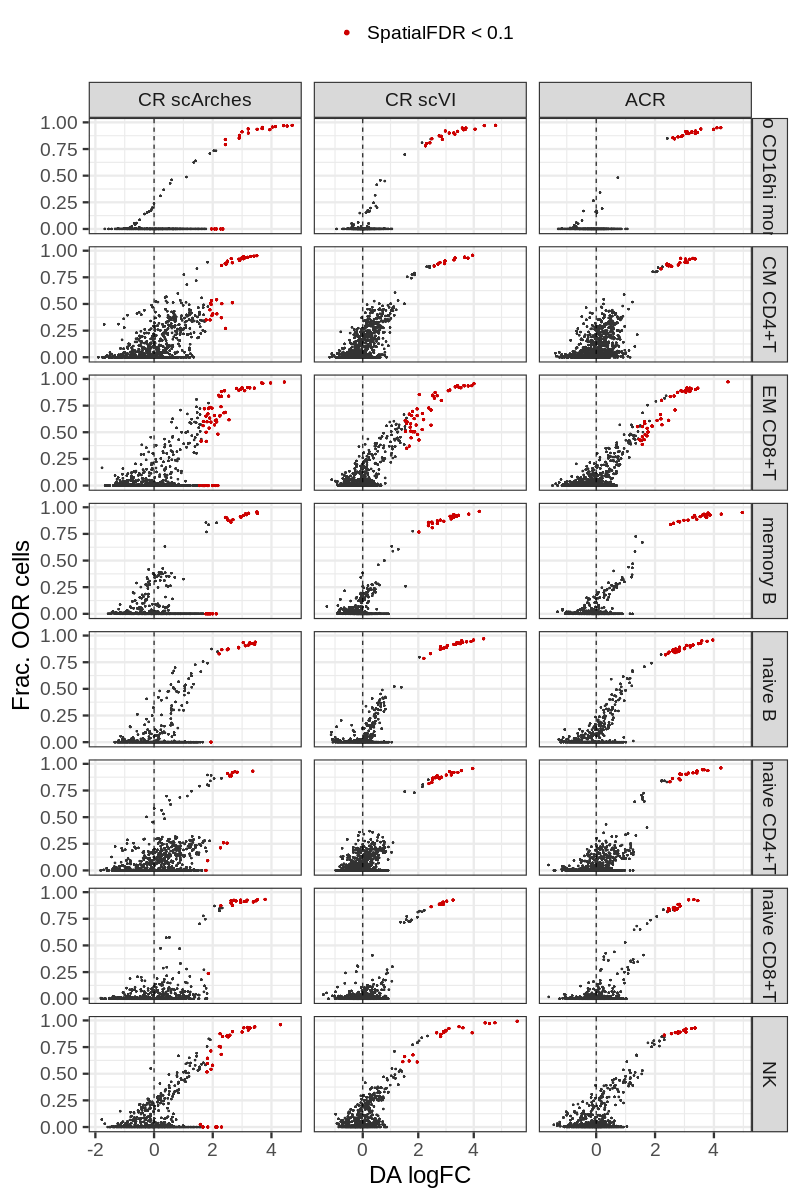

In [123]:
%%R -h 1200 -w 800
nhoods_res_df_all %>%
    mutate(design=factor(design, levels=c('AR', 'CR scArches', 'CR scVI','ACR'))) %>%
    ggplot(aes(OOR_score, frac_OOR_cells)) +
    rasterise(geom_point(size=0.5, color='grey20'), dpi=300) +
    rasterise(geom_point(data=. %>% filter(OOR_signif == 1), aes(color='SpatialFDR < 0.1'),
               size=0.8), dpi=300) +
    facet_grid(perturb_pop_pl~design, scales='free_x') +
    guides(color=guide_legend(title='', override.aes = list(size=2))) +
    theme_bw(base_size=24) +
    scale_color_manual(values = c(`SpatialFDR < 0.1` = 'red3')) +
    geom_vline(xintercept=0, linetype=2) +
    xlab('DA logFC') + ylab('Frac. OOR cells') +
    theme(legend.position='top') 

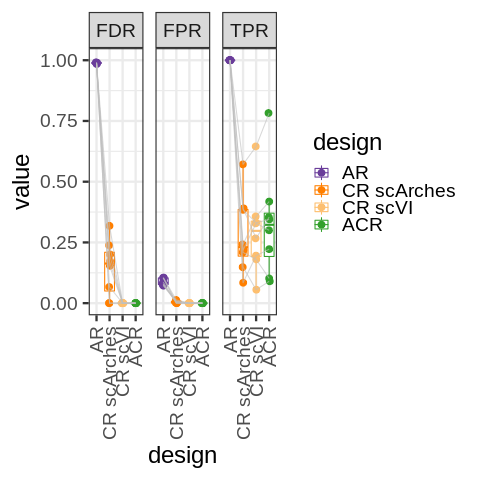

In [193]:
%%R -i tpr_res_df_all
pl2 <- tpr_res_df_all %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
    pivot_longer(cols=c("TPR", 'FDR', 'FPR', 'shift_TPR'), names_to='metric') %>%
    filter(metric != 'shift_TPR') %>%
    ggplot(aes(design, value, color=design)) +
    geom_boxplot(outlier.alpha=0) +
    geom_jitter(size=3, width=0.05) +
    geom_line(aes(group=OOR_state_name), color='grey', alpha=0.6) +
    facet_wrap(metric~.) +
    scale_color_manual(values=design_palette) +
    theme_bw(base_size=24) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5)) 
    
pl2 

In [197]:
auprc_res_df_all = pd.DataFrame()
for perturb_type in ['mixed', 'perturb']:
    for d in [d for d in os.listdir(outdir) if d.endswith('_seed2022') and d.startswith(f'qPBMC_500cells_demo_{perturb_type}')]:
        diff_method = 'milo'
        if 'neutrophil' not in d:
            print(f'Reading {d}')
            print(f'Reading {d}')
            auprc_res_df = pd.read_csv(outdir + d + f'/AUPRC_res.{diff_method}.csv', index_col = 0)
            auprc_res_df['perturbation'] = perturb_type
            auprc_res_df_all = pd.concat([auprc_res_df_all, auprc_res_df])


Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_CD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_CD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_memory_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_memory_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Reading qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_naive_thymus_derived_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022
Read

In [198]:
# auprc_res_df = auprc_res_df_all[['OOR_state_name', 'design', 'AUPRC', 'no_skill_thresh', 'embedding_method']].drop_duplicates()
auprc_res_df = auprc_res_df_all

## Keep 4 designs
auprc_res_df['design'] = np.where(auprc_res_df['design']=='CR', auprc_res_df['design'] + ' ' + auprc_res_df['embedding_method'], auprc_res_df['design'])
auprc_res_df = auprc_res_df[auprc_res_df['design'].isin(["ACR", 'AR', 'CR scVI', 'CR scArches'])].copy()
auprc_res_df = auprc_res_df[~((auprc_res_df['design'] == 'ACR') & (auprc_res_df['embedding_method'] == 'scVI'))]

In [199]:
auprc_res_df.OOR_state_name = np.where(auprc_res_df.OOR_state_name.str.startswith("classical_monocyte_"), auprc_res_df.OOR_state_name.str.split('classical_monocyte_', expand=True)[1], auprc_res_df.OOR_state_name)

In [200]:
cts_oi = [
    'effector_memory_CD8_positive_alpha_beta_T_cell',
 'CD14_low_CD16_positive_monocyte',
 'naive_B_cell',
 'central_memory_CD4_positive_alpha_beta_T_cell',
 'natural_killer_cell',
 'naive_thymus_derived_CD4_positive_alpha_beta_T_cell', 'memory_B_cell','naive_thymus_derived_CD8_positive_alpha_beta_T_cell'
]

In [205]:
%%R -i auprc_res_df
head(auprc_res_df)

  Recall  Precision     AUPRC no_skill_thresh design embedding_method
1      1 0.08888889 0.7569865      0.08888889    ACR         scArches
2      1 0.08898776 0.7569865      0.08888889    ACR         scArches
3      1 0.08908686 0.7569865      0.08888889    ACR         scArches
4      1 0.08918618 0.7569865      0.08888889    ACR         scArches
5      1 0.08928571 0.7569865      0.08888889    ACR         scArches
6      1 0.08938547 0.7569865      0.08888889    ACR         scArches
  OOR_state_name perturbation
1   naive_B_cell        mixed
2   naive_B_cell        mixed
3   naive_B_cell        mixed
4   naive_B_cell        mixed
5   naive_B_cell        mixed
6   naive_B_cell        mixed


In [202]:
# %%R -i cts_oi -w 1000 -h 1500
# auprc_res_df %>%
#     filter(OOR_state_name %in% cts_oi ) %>%
#     mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
#     filter(design!='AR') %>%
# #     pivot_longer(cols=c("AUPRC"), names_to='metric') %>%
#     ggplot(aes(Recall, Precision, color=perturbation)) +
#     geom_line(size=1) +
# #     scale_color_manual(values=design_palette) +
#     theme_bw(base_size=14) +
#     facet_grid(OOR_state_name ~ design)

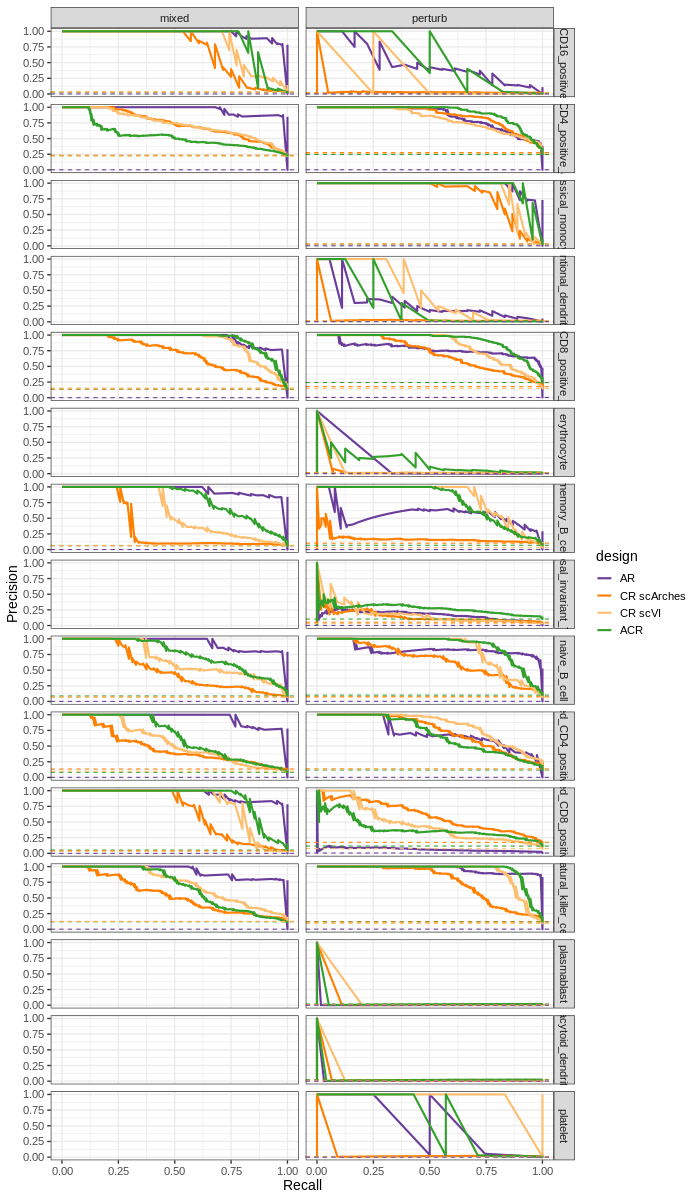

In [206]:
%%R -i cts_oi -w 700 -h 1200
auprc_res_df %>%
#     filter(OOR_state_name %in% cts_oi ) %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
    ggplot(aes(Recall, Precision, color=design)) +
    geom_line(size=1) +
    geom_hline(aes(yintercept=no_skill_thresh, color=design), linetype=2) +
    scale_color_manual(values=design_palette) +
    theme_bw(base_size=14) +
    facet_grid(OOR_state_name ~ perturbation)

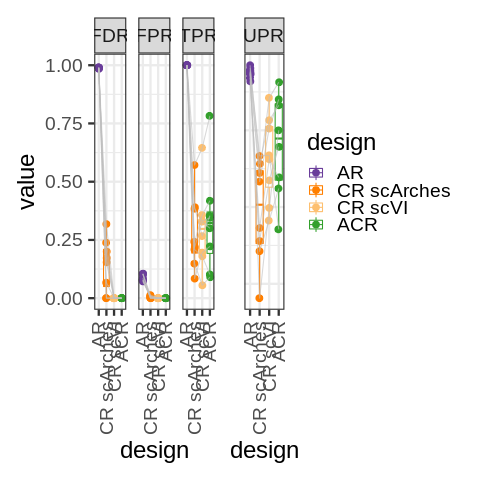

In [207]:
%%R
pl_auprc <- auprc_res_df %>%
    filter(OOR_state_name %in% cts_oi) %>%
    filter(perturbation=='mixed') %>%
    distinct(AUPRC, design, OOR_state_name, perturbation) %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
    pivot_longer(cols=c("AUPRC"), names_to='metric') %>%
    ggplot(aes(design, value, color=design)) +
    geom_boxplot(outlier.alpha=0) +
    geom_jitter(size=3, width=0.05) +
    geom_line(aes(group=OOR_state_name), color='grey', alpha=0.6) +
    facet_wrap(metric~.) +
    scale_color_manual(values=design_palette) +
    theme_bw(base_size=24) +
    remove_y_axis() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5)) 
    
(pl2 + pl_auprc) +
plot_layout(guides='collect', widths=c(3,1)) +
ggsave(paste0(figdir, 'all_metrics_mixed.pdf'), width=15, height=6) +
ggsave(paste0(figdir, 'all_metrics_mixed.png'), width=15, height=6)

In [45]:
def get_FDR_TPR_plot(nh_df):
    fdrs = np.arange(0,1.01, 0.01)
#     fdrs = np.linspace(min(nh_df.logFC),max(nh_df.logFC), 100)
    tprs = []
    obs_fdrs = []
    fprs = []
    for t in fdrs:
        tot_positives = sum(nh_df['OOR_state_group'])
        tot_negatives = sum(nh_df['OOR_state_group']==0)
        tpr = sum((nh_df['SpatialFDR'] <= t) & (nh_df['OOR_state_group'] == 1))/tot_positives
        fpr = sum((nh_df['SpatialFDR'] <= t) & (nh_df['OOR_state_group'] != 1))/tot_negatives
        try:
            obs_fdr = sum((nh_df['SpatialFDR'] <= t) & (nh_df['OOR_state_group'] != 1))/sum((nh_df['SpatialFDR'] <= t))
        except ZeroDivisionError:
            obs_fdr = 0
        obs_fdrs.append(obs_fdr)
        tprs.append(tpr)
        fprs.append(fpr)
    return(pd.DataFrame(np.vstack([fdrs, tprs, obs_fdrs, fprs]).T, columns=["nominal_FDR", "TPR", 'obs_FDR', 'FPR']))

fdr_df_all = pd.DataFrame()
for ct in nhoods_res_df_all.perturb_pop_pl.unique():
    for d in nhoods_res_df_all.design.unique():
        nh_df = nhoods_res_df_all[(nhoods_res_df_all.perturb_pop_pl == ct) & (nhoods_res_df_all.design == d)].copy()
        fdr_df = get_FDR_TPR_plot(nh_df)
        fdr_df['design'] = d
        fdr_df['perturb_pop_pl'] = ct
        fdr_df_all = pd.concat([fdr_df_all, fdr_df])

In [46]:
%%R -i fdr_df_all
head(fdr_df_all)

  nominal_FDR    TPR obs_FDR FPR design perturb_pop_pl
1        0.00 0.0000       0   0    ACR        naive B
2        0.01 0.1125       0   0    ACR        naive B
3        0.02 0.1375       0   0    ACR        naive B
4        0.03 0.2125       0   0    ACR        naive B
5        0.04 0.2500       0   0    ACR        naive B
6        0.05 0.2625       0   0    ACR        naive B


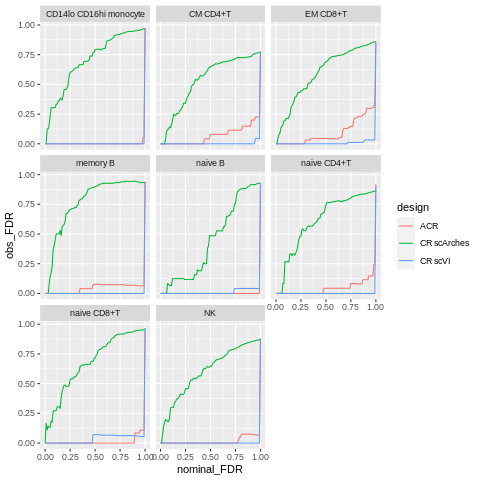

In [47]:
%%R
fdr_df_all %>%
mutate(Precision = 1-obs_FDR) %>%
ggplot(aes(nominal_FDR, obs_FDR, color=design)) +
geom_line() +
facet_wrap(perturb_pop_pl~.)

### Compure sensitivity in shift OOR state

In [208]:
from oor_benchmark.metrics import auprc
shift_auprs_df_all = pd.DataFrame()
for ct in nhoods_res_df_all.perturb_pop_pl.unique():
    for d in nhoods_res_df_all.design.unique():
        nh_df = nhoods_res_df_all[(nhoods_res_df_all.perturb_pop_pl == ct) & (nhoods_res_df_all.design == d)].copy()
        nh_df = nh_df.loc[~((nh_df['OOR_state_group'] == 1) & (nh_df['OOR_state_group_shift'] != 1))]
        nh_df['OOR_state_group'] = nh_df['OOR_state_group_shift'].copy()
        auprc_df = auprc.auprc(nh_df, return_curve=True)
        auprc_df['design'] = d
        auprc_df['perturb_pop_pl'] = ct
        shift_auprs_df_all = pd.concat([shift_auprs_df_all, auprc_df])

In [209]:
shift_auprs_df_all

Recall  Precision     AUPRC  no_skill_thresh design perturb_pop_pl
0         1.0   0.081986  0.366820         0.081986    ACR        naive B
1         1.0   0.082081  0.366820         0.081986    ACR        naive B
2         1.0   0.082176  0.366820         0.081986    ACR        naive B
3         1.0   0.082271  0.366820         0.081986    ACR        naive B
4         1.0   0.082367  0.366820         0.081986    ACR        naive B
...       ...        ...       ...              ...    ...            ...
44426     0.0   0.000000  0.180649         0.005636     AR             NK
44427     0.0   0.000000  0.180649         0.005636     AR             NK
44428     0.0   0.000000  0.180649         0.005636     AR             NK
44429     0.0   0.000000  0.180649         0.005636     AR             NK
44430     0.0   1.000000  0.180649         0.005636     AR             NK

[370811 rows x 6 columns]

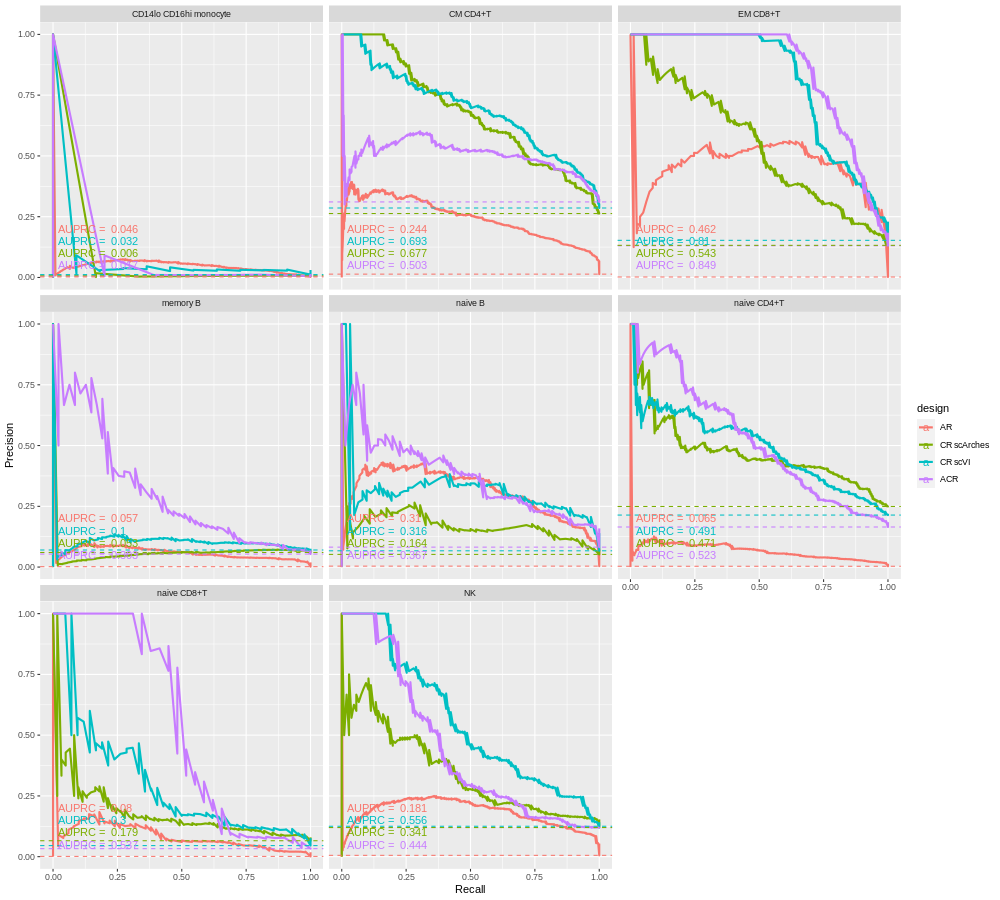

In [210]:
%%R -i shift_auprs_df_all -w 1000 -h 900
shift_auprs_df_all %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
    ggplot(aes(Recall, Precision, color=design)) +
    geom_line(size=1) +
    geom_hline(aes(yintercept=no_skill_thresh, color=design), linetype=2) +
    facet_wrap(perturb_pop_pl ~ .) +
    geom_text(data=. %>% distinct(AUPRC, perturb_pop_pl, design) %>% group_by(perturb_pop_pl) %>% mutate(id = row_number()), 
          aes(label=paste('AUPRC = ',round(AUPRC, 3)), y=id*0.05), x=0.02, hjust=0) 


In [211]:
all_auprc_df = auprc_res_df_all[auprc_res_df_all.perturbation != 'shift']
all_auprc_df['perturb_pop_pl'] = [short_pop_names[x.split('classical_monocyte_')[-1]] for x in all_auprc_df.OOR_state_name]
all_auprc_df = all_auprc_df[all_auprc_df['perturb_pop_pl'].isin([short_pop_names[x] for x in cts_oi])]

shift_auprs_df_all['perturbation'] = 'mixed - small effect'

# auprc_compare = pd.merge(shift_auprs_df_all[['AUPRC', 'design', 'perturb_pop_pl']].drop_duplicates(), all_auprc_df[['AUPRC', 'design', 'perturb_pop_pl']].drop_duplicates(), 
#          on=['perturb_pop_pl', 'design'], suffixes=['_shift', '_both'])
auprc_compare = pd.concat([all_auprc_df, shift_auprs_df_all])
auprc_compare = auprc_compare[['Recall', "Precision", 'AUPRC', 'no_skill_thresh', 'design', 'perturbation', 'perturb_pop_pl']]
auprc_compare

Recall  Precision     AUPRC  no_skill_thresh design  \
0         1.0   0.088889  0.756986         0.088889    ACR   
1         1.0   0.088988  0.756986         0.088889    ACR   
2         1.0   0.089087  0.756986         0.088889    ACR   
3         1.0   0.089186  0.756986         0.088889    ACR   
4         1.0   0.089286  0.756986         0.088889    ACR   
...       ...        ...       ...              ...    ...   
44426     0.0   0.000000  0.180649         0.005636     AR   
44427     0.0   0.000000  0.180649         0.005636     AR   
44428     0.0   0.000000  0.180649         0.005636     AR   
44429     0.0   0.000000  0.180649         0.005636     AR   
44430     0.0   1.000000  0.180649         0.005636     AR   

               perturbation perturb_pop_pl  
0                     mixed        naive B  
1                     mixed        naive B  
2                     mixed        naive B  
3                     mixed        naive B  
4                     mixed        naive B  
...                     ...            ...  
44426  mixed - small effect             NK  
44427  mixed - small effect             NK  
44428  mixed - small effect             NK  
44429  mixed - small effect             NK  
44430  mixed - small effect             NK  

[1116014 rows x 7 columns]

In [212]:
%%R -i auprc_compare
head(auprc_compare)

  Recall  Precision     AUPRC no_skill_thresh design perturbation
1      1 0.08888889 0.7569865      0.08888889    ACR        mixed
2      1 0.08898776 0.7569865      0.08888889    ACR        mixed
3      1 0.08908686 0.7569865      0.08888889    ACR        mixed
4      1 0.08918618 0.7569865      0.08888889    ACR        mixed
5      1 0.08928571 0.7569865      0.08888889    ACR        mixed
6      1 0.08938547 0.7569865      0.08888889    ACR        mixed
  perturb_pop_pl
1        naive B
2        naive B
3        naive B
4        naive B
5        naive B
6        naive B


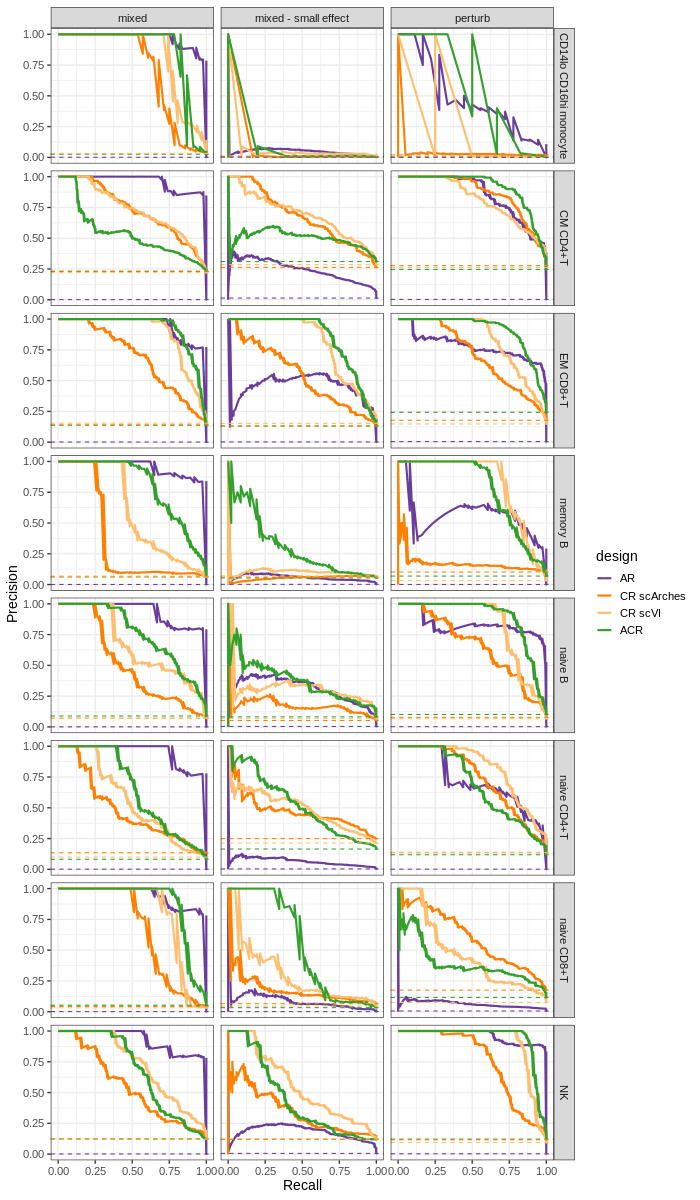

In [215]:
%%R -i cts_oi -w 700 -h 1200
auprc_compare %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
#     filter(design!='AR') %>%
    ggplot(aes(Recall, Precision, color=design)) +
    geom_line(size=1) +
    geom_hline(aes(yintercept=no_skill_thresh, color=design), linetype=2) +
    scale_color_manual(values=design_palette) +
    theme_bw(base_size=14) +
    facet_grid(perturb_pop_pl ~ perturbation)

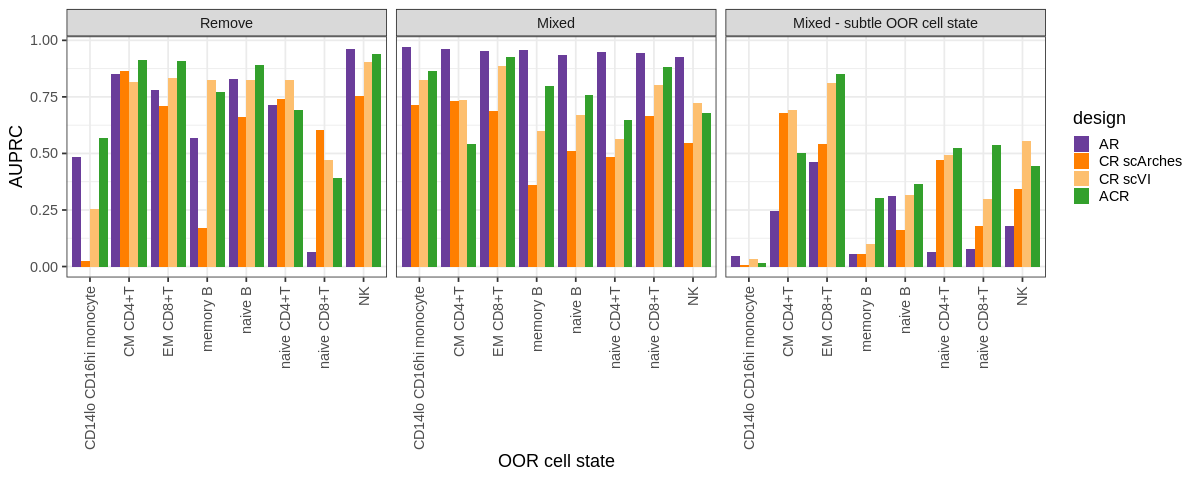

In [220]:
%%R -i cts_oi -w 1200
perturb_labeller <- c(
    'perturb'='Remove',
    'mixed'='Mixed',
    `mixed - small effect`='Mixed - subtle OOR cell state'
)

auprc_compare %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
#     filter(design!='AR') %>%
    distinct(AUPRC, design, no_skill_thresh, perturb_pop_pl, perturbation) %>%
    mutate(perturbation = factor(perturbation, levels=c('perturb', "mixed", "mixed - small effect"))) %>%
    ggplot(aes(perturb_pop_pl, AUPRC, fill=design)) +
    geom_col(position='dodge') +
    scale_fill_manual(values=design_palette) +
    theme_bw(base_size=18) +
    facet_grid(.~perturbation, labeller=labeller(perturbation=perturb_labeller)) +
    xlab("OOR cell state") +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)) +
    ggsave(paste0(figdir, 'AUPRC_barplot_perturb_comparison.pdf'), width=15, height=6) +
    ggsave(paste0(figdir, 'AUPRC_barplot_perturb_comparison.png'), width=15, height=6)

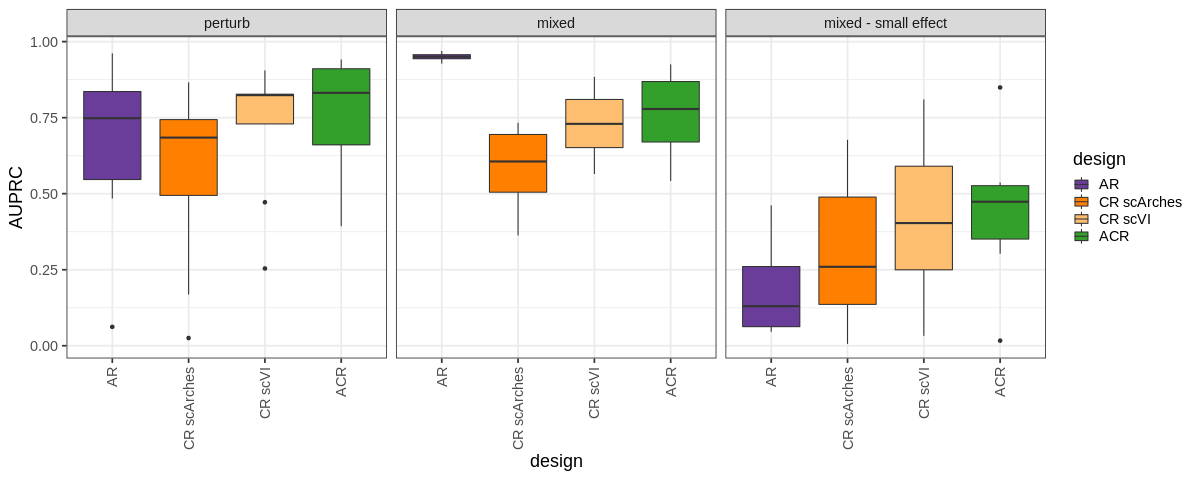

In [217]:
%%R -i cts_oi -w 1200
auprc_compare %>%
    mutate(design = factor(design, levels=c('AR', "CR scArches", "CR scVI", 'ACR'))) %>%
#     filter(design!='AR') %>%
    distinct(AUPRC, design, no_skill_thresh, perturb_pop_pl, perturbation) %>%
    mutate(perturbation = factor(perturbation, levels=c('perturb', "mixed", "mixed - small effect"))) %>%
    ggplot(aes(design, AUPRC, fill=design)) +
    geom_boxplot() +
    scale_fill_manual(values=design_palette) +
    theme_bw(base_size=18) +
    facet_grid(.~perturbation) +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5))

## Compare HVG relevance

In [74]:
from diff2atlas.utils import anndata2pseudobulk
from sklearn.preprocessing import StandardScaler,MinMaxScaler

def _get_model_vars(model_dir):
    vars = sc.read(model_dir + '/adata.h5ad', backed=True).var
    return(vars)

def get_gene_DEscores(simdir, keep_markers=False, shift_only=False):
    '''
    Compute DE score for each gene in a specific simulation
    '''
    adata = sc.read_h5ad(simdir+'/ACR_design.scArches_milo.h5ad')
    
    if shift_only:
        perturb_pop = adata.obs.loc[adata.obs['OOR_state'] == 1, 'cell_type'].unique()
        perturb_pop_remove = 'classical_monocyte'
        perturb_pop_shift = perturb_pop[perturb_pop != perturb_pop_remove][0]
        adata.obs['OOR_state'] = np.where((adata.obs['OOR_state'] == 1) & (adata.obs['cell_type'] == perturb_pop_shift), 1, 0)
    
    # Pseudobulk 
#     pbulk_oor = anndata2pseudobulk(adata, group_by=['sample_id', 'OOR_state'], agg='s')
    pbulk_oor = adata
    sc.pp.normalize_per_cell(pbulk_oor)
    sc.pp.log1p(pbulk_oor)
    pbulk_oor.obs['OOR_state'] = pbulk_oor.obs['OOR_state'].astype("category")
    
    # Gene gene scores (for condition and OOR state)
    sc.tl.rank_genes_groups(pbulk_oor, groupby='OOR_state', reference=0)
    oor_rank_genes_df = sc.get.rank_genes_groups_df(pbulk_oor, group='1')
    
    oor_rank_genes_df['scores'] = -2*np.log(oor_rank_genes_df['pvals_adj']) * np.sign(oor_rank_genes_df['logfoldchanges'])
    if keep_markers:
        oor_rank_genes_df.loc[(oor_rank_genes_df['pvals_adj'] > 0.1) | (oor_rank_genes_df['logfoldchanges'] < 0), 'scores'] = 0

    gene_score_df = oor_rank_genes_df[['names', 'scores', 'pvals_adj']]    
    return(gene_score_df)

Global seed set to 0


In [75]:
dirs = [x for x in os.listdir(outdir) if x.startswith("qPBMC_500cells_demo_shift")]
dirs

['qPBMC_500cells_demo_shift_cell_typememory_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_shift_cell_typeeffector_memory_CD8_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_shift_cell_typeCD14_low_CD16_positive_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_shift_cell_typeclassical_monocyte_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_shift_cell_typenaive_B_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_shift_cell_typecentral_memory_CD4_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_shift_cell_typenatural_killer_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022',
 'qPBMC_500cells_demo_shift_cell_typenaive_thymus_derived_CD8_positive_alpha_beta_T_cell_queryBatchdataset_id10_1038_s41591_021_01329_2_seed2022

In [76]:
cts_oi = [d.split('cell_type')[-1].split("_query")[0] for d in dirs]
cts_oi = [
    'effector_memory_CD8_positive_alpha_beta_T_cell',
 'CD14_low_CD16_positive_monocyte',
 'naive_B_cell',
 'central_memory_CD4_positive_alpha_beta_T_cell',
 'natural_killer_cell',
 'naive_thymus_derived_CD4_positive_alpha_beta_T_cell', 
    'memory_B_cell',
    'naive_thymus_derived_CD8_positive_alpha_beta_T_cell'
]


In [77]:
for perturb_pop in cts_oi:
# perturb_pop = 'naive_thymus_derived_CD4_positive_alpha_beta_T_cell'
    if not os.path.exists(f'{outdir}/HVG_DE_Scores.{perturb_pop}.csv'):
        scores_df_all = pd.DataFrame()
        print(f"Reading {perturb_pop}")
        shift_dir = [x for x in os.listdir(outdir) if x.startswith(f'qPBMC_500cells_demo_shift_cell_type{perturb_pop}') and x.endswith("seed2022")][0]
        remove_dir = [x for x in os.listdir(outdir) if x.startswith(f'qPBMC_500cells_demo_perturb_cell_type{perturb_pop}') and x.endswith("seed2022")][0]
        mixed_dir = [x for x in os.listdir(outdir) if x.startswith(f'qPBMC_500cells_demo_mixed_cell_typeclassical_monocyte_{perturb_pop}') and x.endswith("seed2022")][0]
        for simdir in [remove_dir, mixed_dir]:
    #         try:
            if simdir == mixed_dir:
                gene_scores = get_gene_DEscores(outdir+simdir, keep_markers=True, shift_only=True)
            else:
                gene_scores = get_gene_DEscores(outdir+simdir, keep_markers=True, shift_only=False)
    #         except ValueError:
    #             continue
            ctrl_hvgs = _get_model_vars(outdir + simdir + f'/model_ctrl').index
            try:
                ctrlquery_hvgs = _get_model_vars(outdir + simdir + f'/model_ctrlquery').index
            except:
                if simdir == remove_dir:
                    ctrlquery_hvgs = _get_model_vars(outdir + simdir +'/HVG_comparison/model_5000HVG_ctrlquery').index
            atlas_hvgs = _get_model_vars(outdir + simdir + f'/model_atlas').index
            gene_scores['is_ctrl_hvg'] = gene_scores.names.isin(ctrl_hvgs)
            gene_scores['is_ctrlquery_hvg'] = gene_scores.names.isin(ctrlquery_hvgs)
            gene_scores['is_atlas_hvg'] = gene_scores.names.isin(atlas_hvgs)
            if simdir == shift_dir:
                gene_scores['perturbation'] = 'shift'
            elif simdir == mixed_dir:
                gene_scores['perturbation'] = 'mixed'
            else:
                gene_scores['perturbation'] = 'remove'
            gene_scores['OOR_state_name'] = perturb_pop
            scores_df_all = pd.concat([scores_df_all, gene_scores])
        scores_df_all.to_csv(f'{outdir}/HVG_DE_Scores.{perturb_pop}.csv')

Reading memory_B_cell


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Reading naive_thymus_derived_CD8_positive_alpha_beta_T_cell


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Read output

In [86]:
hvg_scores_all = pd.DataFrame()
for perturb_pop in cts_oi:
    try:
        hvg_scores = pd.read_csv(f'{outdir}/HVG_DE_Scores.{perturb_pop}.csv', index_col=0)
    except:
        continue
    hvg_scores['perturb_pop'] = short_pop_names[perturb_pop]
    hvg_scores_all = pd.concat([hvg_scores_all, hvg_scores])

In [87]:
# hvg_scores_all['scores'] = hvg_scores_all.groupby(['perturbation', 'OOR_state_name'])['scores'].apply(lambda x: (x-min(x))/(max(x) - min(x)))

In [88]:
%%R -i hvg_scores_all
head(hvg_scores_all)

            names   scores     pvals_adj is_ctrl_hvg is_ctrlquery_hvg
1 ENSG00000105374      Inf  0.000000e+00        TRUE             TRUE
2 ENSG00000100450 1458.811 1.672080e-317        TRUE             TRUE
3 ENSG00000077984      Inf  0.000000e+00        TRUE             TRUE
4 ENSG00000008517      Inf  0.000000e+00        TRUE             TRUE
5 ENSG00000166710      Inf  0.000000e+00        TRUE             TRUE
6 ENSG00000206503 1202.739 6.736971e-262        TRUE             TRUE
  is_atlas_hvg perturbation                                 OOR_state_name
1         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
2         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
3         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
4         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
5         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
6         TRUE        shift effector_memory_CD8_positive_alp

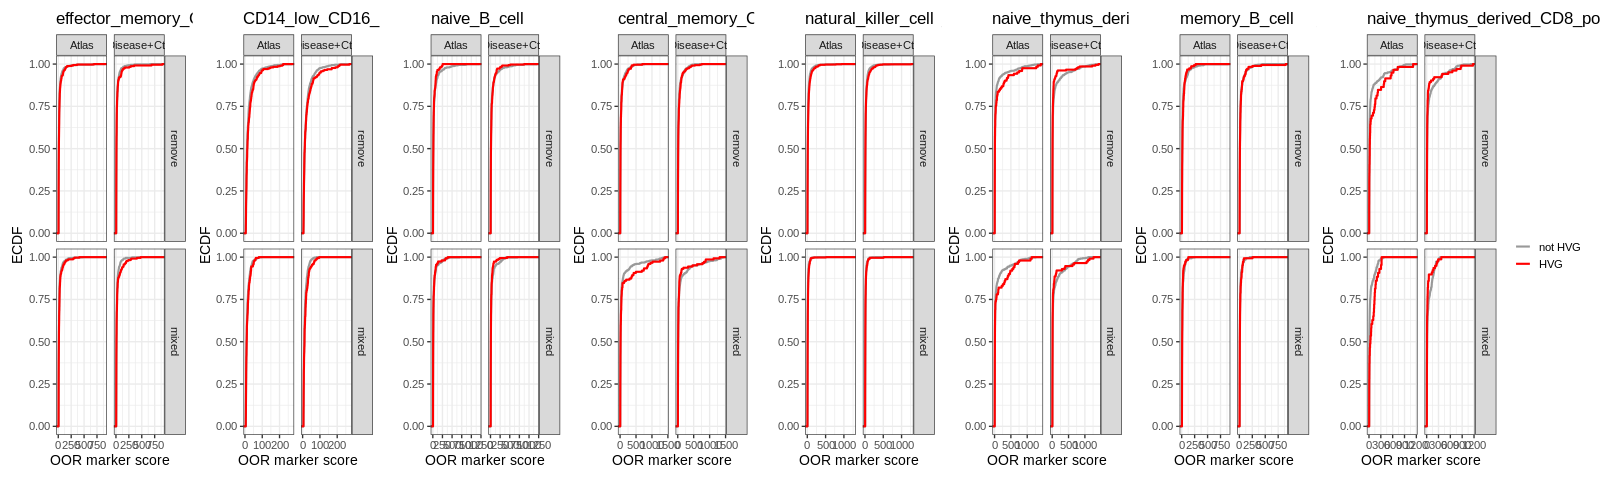

In [110]:
%%R -w 1600 

pl_ls <- lapply(unique(hvg_scores_all$OOR_state_name), function(x) {
    hvg_scores_all %>%
        filter(OOR_state_name == x) %>%
        filter(scores > 0) %>%
        filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
        pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
        mutate(perturbation = factor(perturbation, levels=c("remove", 'shift', 'mixed'))) %>%
    filter(HVG_dataset!='is_ctrl_hvg')    %>%
    mutate(HVG_dataset = factor(ifelse(HVG_dataset == 'is_atlas_hvg', 'Atlas', 'Disease+Ctrl'), levels=c('Atlas', 'Disease+Ctrl'))) %>%
        mutate(is_hvg = factor(ifelse(is_hvg, 'HVG', 'not HVG'), levels=c('not HVG', 'HVG'))) %>%
    filter(perturbation!='shift') %>%
        ggplot(aes( scores, color=is_hvg)) +
        stat_ecdf(size=1) +
        facet_grid(perturbation~HVG_dataset, scales='free_x') +
        theme_bw(base_size=14) +
    scale_color_manual(values=c('not HVG'='grey60', 'HVG'='red'), name='') +
        ylab('ECDF') + xlab('OOR marker score') +
        ggtitle(x)})

wrap_plots(pl_ls) + plot_layout(nrow=1, guides='collect')


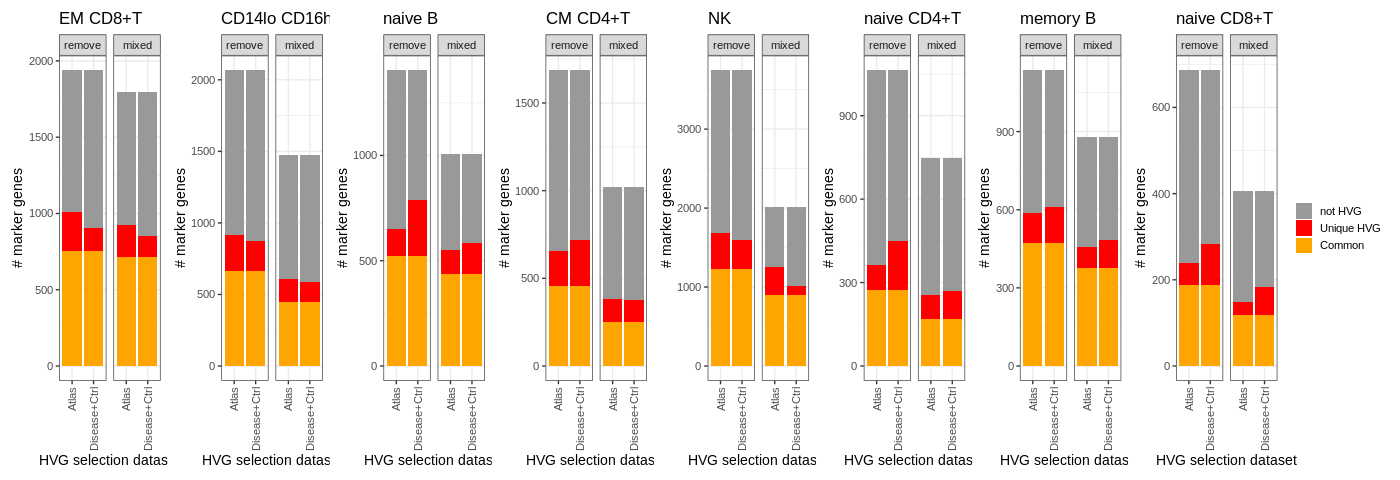

In [114]:
%%R -w 1400 

pl_ls <- lapply(unique(hvg_scores_all$perturb_pop), function(x) {
    hvg_scores_all %>%
        filter(perturb_pop == x) %>%
        filter(scores > 0) %>%
        mutate(common_hvg = is_atlas_hvg & is_ctrlquery_hvg) %>%
        pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
        mutate(perturbation = factor(perturbation, levels=c("remove", 'shift', 'mixed'))) %>%
    filter(HVG_dataset!='is_ctrl_hvg')    %>%
    mutate(HVG_dataset = factor(ifelse(HVG_dataset == 'is_atlas_hvg', 'Atlas', 'Disease+Ctrl'), levels=c('Atlas', 'Disease+Ctrl'))) %>%    
    mutate(is_hvg = ifelse(is_hvg, 'Unique HVG', 'not HVG')) %>%
        mutate(is_hvg = factor(ifelse(common_hvg, 'Common', as.character(is_hvg)), levels=c('not HVG', 'Unique HVG', 'Common'))) %>%
#         filter(is_hvg != 'not HVG') %>%
        filter(perturbation!='shift') %>%
        ggplot(aes(x=HVG_dataset, fill=is_hvg)) +
        geom_bar(position='stack') +
        facet_grid(.~perturbation, scales='free_x') +
        theme_bw(base_size=14) +
    scale_fill_manual(values=c('not HVG'='grey60', 'Unique HVG'='red', 'Common'='orange'), name='') +
        ylab('# marker genes') + xlab('HVG selection dataset') +
        ggtitle(x) +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5))
})

wrap_plots(pl_ls) + plot_layout(nrow=1, guides='collect')


`summarise()` has grouped output by 'HVG_dataset', 'perturbation',
'perturb_pop', 'is_hvg'. You can override using the `.groups` argument.


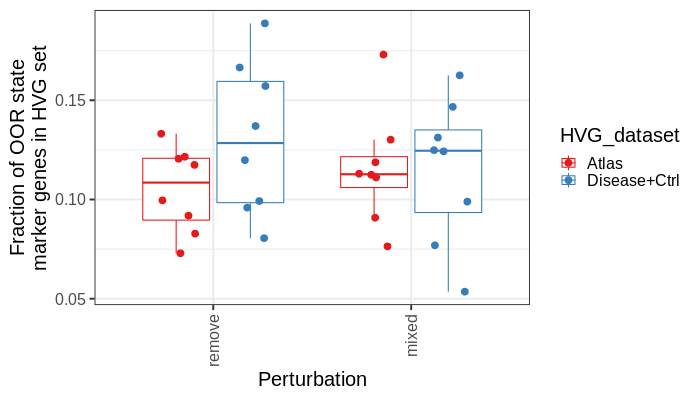

In [94]:
%%R -w 700 -h 400
pl_df <- hvg_scores_all %>%
    filter(scores > 0) %>%
    mutate(common_hvg = is_atlas_hvg & is_ctrlquery_hvg) %>%
    pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
    mutate(perturbation = factor(perturbation, levels=c("remove", 'shift', 'mixed'))) %>%
    filter(HVG_dataset!='is_ctrl_hvg')    %>%
    mutate(HVG_dataset = factor(ifelse(HVG_dataset == 'is_atlas_hvg', 'Atlas', 'Disease+Ctrl'), levels=c('Atlas', 'Disease+Ctrl'))) %>%    
    mutate(is_hvg = ifelse(is_hvg, 'Unique HVG', 'not HVG')) %>%
    mutate(is_hvg = factor(ifelse(common_hvg, 'Common', as.character(is_hvg)), levels=c('not HVG', 'Unique HVG', 'Common'))) %>%
    group_by(HVG_dataset, perturbation, perturb_pop) %>%
    mutate(tot_markers=n()) %>%
    ungroup() %>%
    group_by(HVG_dataset, perturbation, perturb_pop, is_hvg) %>%
    summarise(frac = n()/tot_markers) %>%
    distinct() %>%
    filter(is_hvg == 'Unique HVG') %>%
    filter(perturbation!='shift') 
    
pl_df %>%
    ggplot(aes(x=perturbation, frac, color=HVG_dataset)) +
    geom_boxplot(outlier.alpha=0) +
    geom_point(position=position_jitterdodge(), size=3) +
#     facet_grid(.~perturbation, scales='free_x') +
    theme_bw(base_size=20) +
    scale_color_brewer(palette='Set1') +
    ylab('Fraction of OOR state\nmarker genes in HVG set') + xlab('Perturbation') +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5))



In [107]:
%%R 
pl_df %>%
arrange(perturb_pop) %>%
group_by(HVG_dataset, perturbation) %>%
summarise(frac=list(frac)) %>%
spread(perturbation, frac) %>%
group_by(HVG_dataset) %>%
mutate(p_val = wilcox.test(unlist(remove), unlist(mixed), paired=FALSE)$p.value)
    

`summarise()` has grouped output by 'HVG_dataset'. You can override using the
`.groups` argument.
# A tibble: 2 × 4
# Groups:   HVG_dataset [2]
  HVG_dataset  remove    mixed     p_val
  <fct>        <list>    <list>    <dbl>
1 Atlas        <dbl [8]> <dbl [8]> 0.798
2 Disease+Ctrl <dbl [8]> <dbl [8]> 0.505


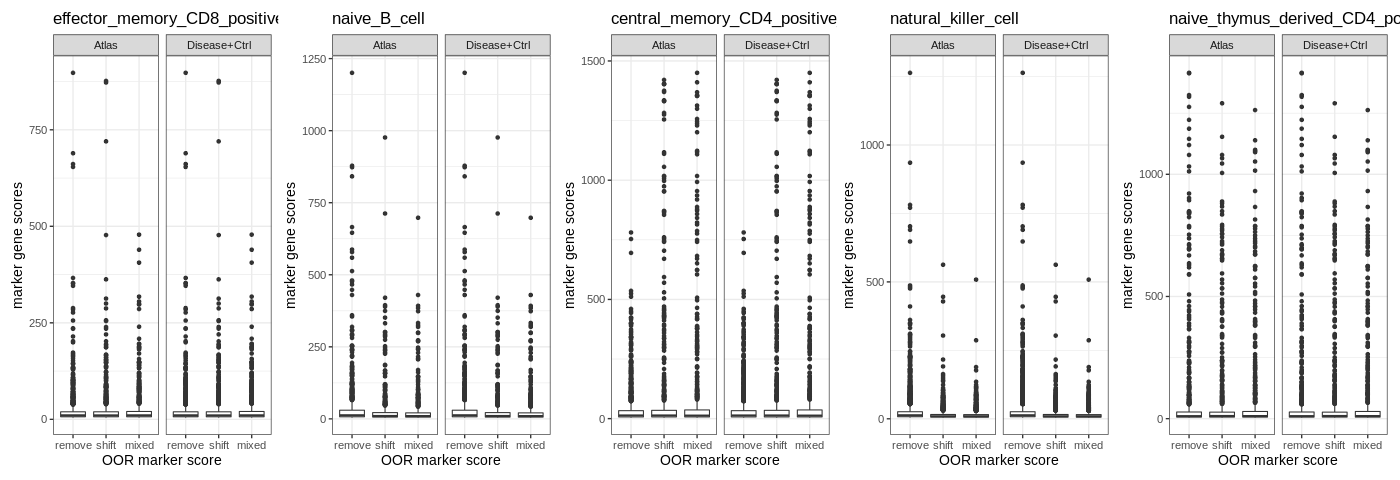

In [130]:
%%R -w 1400 

pl_ls <- lapply(unique(hvg_scores_all$OOR_state_name), function(x) {
    hvg_scores_all %>%
        filter(OOR_state_name == x) %>%
        filter(scores > 0) %>%
        filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
        pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
        mutate(perturbation = factor(perturbation, levels=c("remove", 'shift', 'mixed'))) %>%
    filter(HVG_dataset!='is_ctrl_hvg')    %>%
    mutate(HVG_dataset = factor(ifelse(HVG_dataset == 'is_atlas_hvg', 'Atlas', 'Disease+Ctrl'), levels=c('Atlas', 'Disease+Ctrl'))) %>%
        mutate(is_hvg = factor(ifelse(is_hvg, 'HVG', 'not HVG'), levels=c('not HVG', 'HVG'))) %>%
        ggplot(aes(x=perturbation, y=scores)) +
        geom_boxplot() +
        facet_grid(.~HVG_dataset, scales='free_x') +
        theme_bw(base_size=14) +
#     scale_fill_manual(values=c('not HVG'='grey60', 'HVG'='red'), name='') +
        ylab('marker gene scores') + xlab('OOR marker score') +
        ggtitle(x)})

wrap_plots(pl_ls) + plot_layout(nrow=1, guides='collect')


In [131]:
%%R -w 300 
pl_ls <- lapply(unique(hvg_scores_all$OOR_state_name), function(x) {hvg_scores_all %>%
filter(OOR_state_name == x) %>%
filter(scores > 0) %>%
filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
mutate(perturbation = factor(perturbation, levels=c("remove", 'shift', 'mixed'))) %>%
ggplot(aes(HVG_dataset, scores, color=is_hvg)) +
geom_boxplot(varwidth=TRUE)+
facet_grid(perturbation~OOR_state_name, scales='free')})

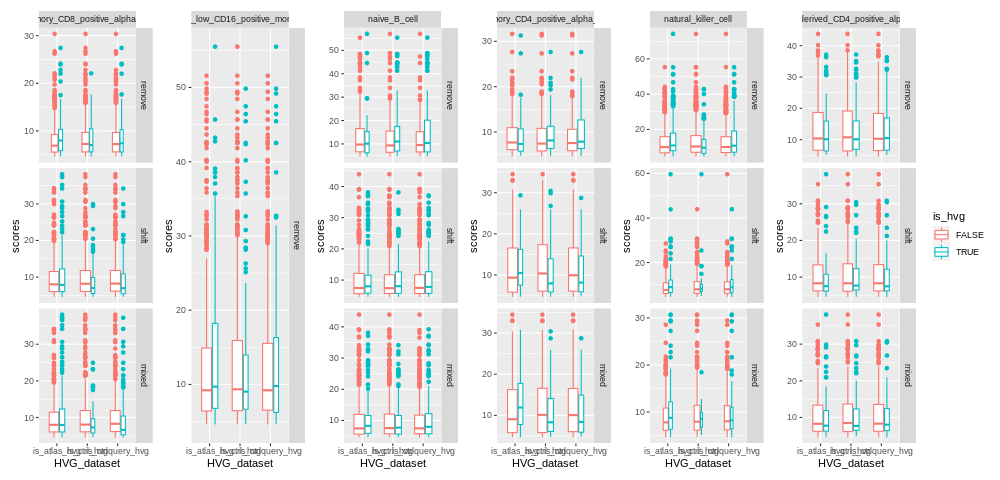

In [85]:
%%R -w 1000
library(patchwork)
wrap_plots(pl_ls) + plot_layout(nrow=1, guides='collect')

In [188]:
%%R -i scores_df_all
head(scores_df_all)

            names   scores    pvals_adj is_ctrl_hvg is_ctrlquery_hvg
1 ENSG00000166710 38.50216 4.358753e-09        TRUE             TRUE
2 ENSG00000100450 43.63418 3.349337e-10        TRUE             TRUE
3 ENSG00000077984 42.15130 7.030117e-10        TRUE             TRUE
4 ENSG00000081237 42.15130 7.030117e-10        TRUE             TRUE
5 ENSG00000235162 42.15130 7.030117e-10        TRUE             TRUE
6 ENSG00000078304 42.15130 7.030117e-10        TRUE             TRUE
  is_atlas_hvg perturbation                                 OOR_state_name
1         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
2         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
3         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
4         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
5         TRUE        shift effector_memory_CD8_positive_alpha_beta_T_cell
6         TRUE        shift effector_memory_CD8_positive_alpha_beta

Are highly variable genes capturing less DE genes with a more subtle perturbation?

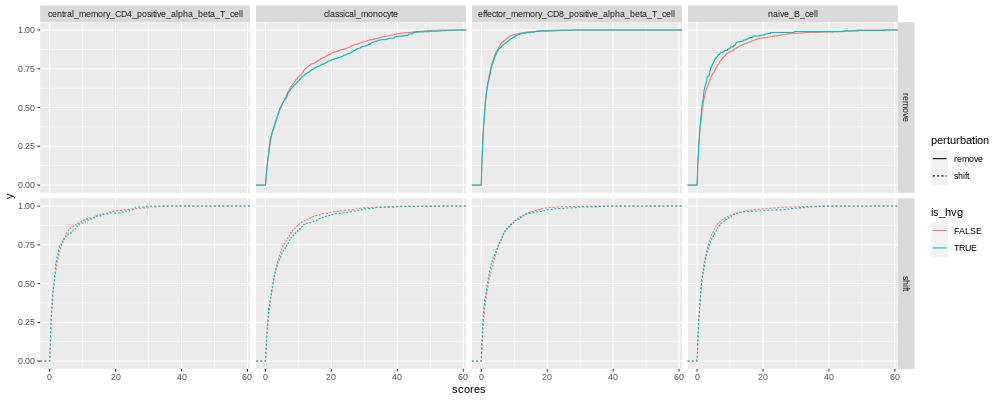

In [194]:
%%R -w 1000 -h 400
scores_df_all %>%
filter(scores > 0) %>%
# group_by(perturbation) %>%
# mutate(scores=scale(scores, center=FALSE)) %>%
filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
filter(HVG_dataset == 'is_atlas_hvg') %>%
ggplot(aes(scores, color=is_hvg, linetype=perturbation)) +
stat_ecdf() +
facet_grid(perturbation~OOR_state_name)

What percentage of markers are HVGs?

In [158]:
%%R -w 1000 -h 400
scores_df_all %>%
filter(pvals_adj < 0.1 & scores >0) %>%
# filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
group_by(HVG_dataset, perturbation) %>%
summarise(n_hvg = sum(is_hvg), frac_hvg = sum(is_hvg)/n())
# ggplot(aes(scores, color=is_hvg, linetype=perturbation)) +
# stat_ecdf() +
# facet_wrap(perturbation~HVG_dataset)

`summarise()` has grouped output by 'HVG_dataset'. You can override using the
`.groups` argument.
# A tibble: 6 × 4
# Groups:   HVG_dataset [3]
  HVG_dataset      perturbation n_hvg frac_hvg
  <chr>            <chr>        <int>    <dbl>
1 is_atlas_hvg     remove         804    0.486
2 is_atlas_hvg     shift          647    0.535
3 is_ctrl_hvg      remove         638    0.386
4 is_ctrl_hvg      shift          573    0.474
5 is_ctrlquery_hvg remove         759    0.459
6 is_ctrlquery_hvg shift          607    0.502


If we consider markers of the OOR state, with a strong perturbation the selected HVGs include the stronger markers. With a small perturbation hvg selection doesn't prioritize strong markers. When selecting genes from the atlas dataset, this distinction is not apparent.

In [164]:
%%R
test_df <- scores_df_all %>%
    filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
    filter(scores > 0) %>%
    filter(perturbation == 'remove')
    
print(ks.test(test_df[test_df$is_ctrlquery_hvg, 'scores'], test_df[!test_df$is_ctrlquery_hvg, 'scores'], alternative='less'))
print(ks.test(test_df[test_df$is_atlas_hvg, 'scores'], test_df[!test_df$is_atlas_hvg, 'scores'], alternative='less'))

test_df <- scores_df_all %>%
    filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
    filter(scores > 0) %>%
    filter(perturbation == 'shift')
    
print(ks.test(test_df[test_df$is_ctrlquery_hvg, 'scores'], test_df[!test_df$is_ctrlquery_hvg, 'scores'], alternative='less'))
print(ks.test(test_df[test_df$is_atlas_hvg, 'scores'], test_df[!test_df$is_atlas_hvg, 'scores'], alternative='less'))


	Two-sample Kolmogorov-Smirnov test

data:  test_df[test_df$is_ctrlquery_hvg, "scores"] and test_df[!test_df$is_ctrlquery_hvg, "scores"]
D^- = 0.14725, p-value = 4.113e-08
alternative hypothesis: the CDF of x lies below that of y


	Two-sample Kolmogorov-Smirnov test

data:  test_df[test_df$is_atlas_hvg, "scores"] and test_df[!test_df$is_atlas_hvg, "scores"]
D^- = 0.047818, p-value = 0.1214
alternative hypothesis: the CDF of x lies below that of y


	Two-sample Kolmogorov-Smirnov test

data:  test_df[test_df$is_ctrlquery_hvg, "scores"] and test_df[!test_df$is_ctrlquery_hvg, "scores"]
D^- = 0.037298, p-value = 0.3219
alternative hypothesis: the CDF of x lies below that of y


	Two-sample Kolmogorov-Smirnov test

data:  test_df[test_df$is_atlas_hvg, "scores"] and test_df[!test_df$is_atlas_hvg, "scores"]
D^- = 0.042693, p-value = 0.1857
alternative hypothesis: the CDF of x lies below that of y



In [468]:
scores_df_all[scores_df_all.is_atlas_hvg & scores_df_all.is_ctrl_hvg & scores_df_all.is_ctrlquery_hvg].groupby('perturbation').size()

perturbation
remove    2915
shift     2947
dtype: int64

In [ ]:
%%R -w 900 -h 300
scores_df_all %>%
# filter(scores_oor_state > 0) %>%
# filter(!(is_ctrl_hvg & is_atlas_hvg & is_ctrlquery_hvg)) %>%
# pivot_longer(c(is_ctrl_hvg, is_atlas_hvg, is_ctrlquery_hvg), names_to='HVG_dataset', values_to='is_hvg') %>%
# filter(is_hvg) %>%
ggplot(aes(scores, color=OOR_state_name,linetype=perturbation)) +
stat_ecdf(size=1) +
theme_bw(base_size=20) +
facet_grid(OOR_state_name~., scales='free')

In [329]:
scores_df_all.sort_values(['OOR_state_name', 'perturbation', 'scores_oor_state'])

names  scores_condition  scores_oor_state  is_ctrl_hvg  \
4666  ENSG00000163002          0.212376        -10.690331        False   
2518  ENSG00000198286          0.744844         -9.749361         True   
3688  ENSG00000151729          0.437354         -8.464155        False   
6018  ENSG00000144451         -0.076973         -8.403049        False   
4257  ENSG00000164114          0.303844         -8.244114         True   
...               ...               ...               ...          ...   
332   ENSG00000077238          1.923612          3.790663         True   
1914  ENSG00000147535          0.959323          4.132433         True   
8357  ENSG00000156171         -0.565121          4.370890        False   
3381  ENSG00000204852          0.555885          4.900017         True   
1613  ENSG00000175895          1.066106          5.480191         True   

      is_ctrlquery_hvg  is_atlas_hvg perturbation      OOR_state_name  
4666             False         False       remove  classical_monocyte  
2518              True          True       remove  classical_monocyte  
3688             False          True       remove  classical_monocyte  
6018             False         False       remove  classical_monocyte  
4257              True          True       remove  classical_monocyte  
...                ...           ...          ...                 ...  
332               True          True        shift        naive_B_cell  
1914              True          True        shift        naive_B_cell  
8357             False          True        shift        naive_B_cell  
3381              True          True        shift        naive_B_cell  
1613              True          True        shift        naive_B_cell  

[70344 rows x 8 columns]